In [1]:
# Takes a list of smiles and partitions it according to
# - compounds that match the rule
# - compounds that do not match the rule

In [2]:
from fg_mapping import smiles_fg_counts

In [3]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

from IPython.display import Image, display 
import requests
from urllib.parse import quote

def inspect_smarts(smarts:str,) -> None:
    base_url = "https://smarts.plus/smartsview/download_rest?filetype=png;vmode=0;textdesc=0;depsymbols=0;smartsheading=0;smarts="
    res = requests.get(url=base_url+quote(smarts), verify=False, stream='all')
    display(Image(res.content))

p_str = ""
def split_by_rules(smiles:'list[str]',rules:'list[str]',):
    global p_str
    """
    Displays first all molecules that match the given rules.
    Secondly, all molecules not matching any of the given rules
    are displayed.
    
    """
    rslt = smiles_fg_counts(smiles,atoms=True)
    p_str += str((rules[0],rslt))
    smi_yes = [smi for smi in smiles
               if any(rule in rslt[smi] for rule in rules)
              ]
    smi_no = [smi for smi in smiles if smi not in smi_yes]
    
    mol_yes =[Chem.MolFromSmiles(Chem.CanonSmiles(smi)) for smi in smi_yes]
    mol_no =[Chem.MolFromSmiles(Chem.CanonSmiles(smi)) for smi in smi_no]
    
    for smi,mol in zip(smi_yes+smi_no,mol_yes+mol_no):
        for rule in rslt[smi]:
            if rule not in rules: continue
            mol.SetProp(rule,"")
            if not hasattr(mol,"__sssAtoms"):
                mol.__sssAtoms = []
                
            mol.__sssAtoms += list(rslt[smi][rule][1])
         
    return mol_yes,mol_no

def display_split_by_rules(smiles,rules):
    mol_yes,mol_no = split_by_rules(smiles,rules)
    
    print("="*80)
    print("YES match")
    print("="*80)

    if mol_yes:
        display(
            Chem.Draw.MolsToGridImage(mol_yes,
            highlightAtomLists=[mol.__sssAtoms for mol in mol_yes])
        )

    print("="*80)
    print("NO match")
    print("="*80)
    if mol_no:
        display(Chem.Draw.MolsToGridImage(mol_no))
        

In [4]:
import pandas as pd
test_data = pd.read_csv("test_smiles.txt",sep="\t",)

In [5]:
test_data

,SMILES,FG
0,Fc1ccc(C(=O)Cn2cncn2)c(F)c1,halogen.fluorine.aromatic
1,Fc1ccc(C(=O)Cn2cncn2)c(F)c1,ketone
2,Fc1ccc(C(=O)Cn2cncn2)c(F)c1,triazole
3,Oc1cc(ccc1N2CCN(CC2)C(F)(F)F)C(=O)Cl,acidchloride.aromatic
4,Oc1cc(ccc1N2CCN(CC2)C(F)(F)F)C(=O)Cl,alcohol.aromatic
5,Oc1cc(ccc1N2CCN(CC2)C(F)(F)F)C(=O)Cl,halogen.fluorine.trifluoromethyl
6,Oc1cc(ccc1N2CCN(CC2)C(F)(F)F)C(=O)Cl,piperazine
7,o1cnc(c1)c2cn(c3oncc3)c(n2)n4cnnn4,oxazole
8,o1cnc(c1)c2cn(c3oncc3)c(n2)n4cnnn4,isoxazole
9,o1cnc(c1)c2cn(c3oncc3)c(n2)n4cnnn4,tetrazole


In [6]:
display_split_by_rules(smiles,["halogen.fluorine.aromatic"])

NameError: name 'smiles' is not defined

In [7]:
p_str

''

********************************************************************************
halogen.fluorine.aromatic
********************************************************************************
YES match


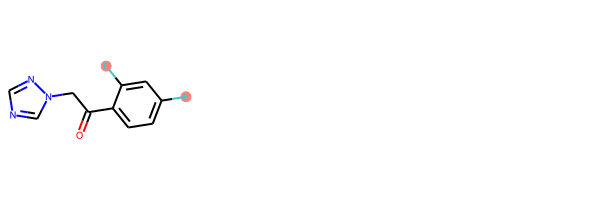

NO match


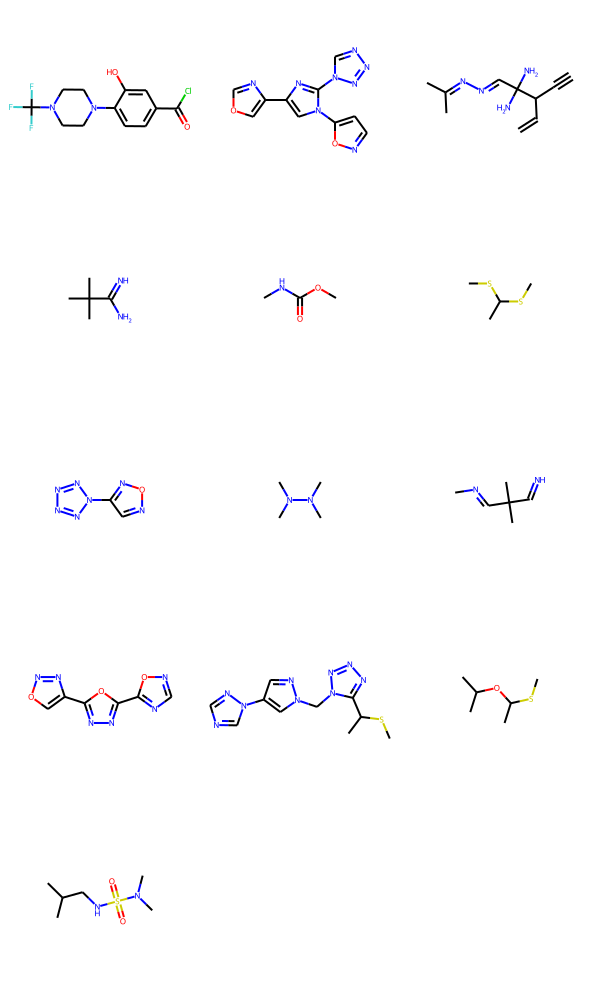

********************************************************************************
ketone
********************************************************************************
YES match
NO match


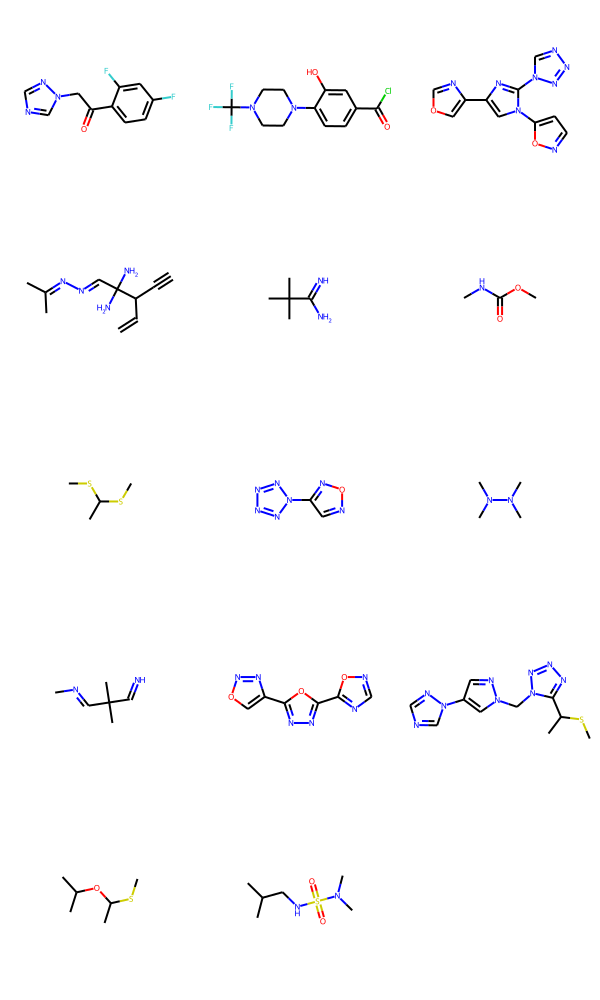

********************************************************************************
triazole
********************************************************************************
YES match
NO match


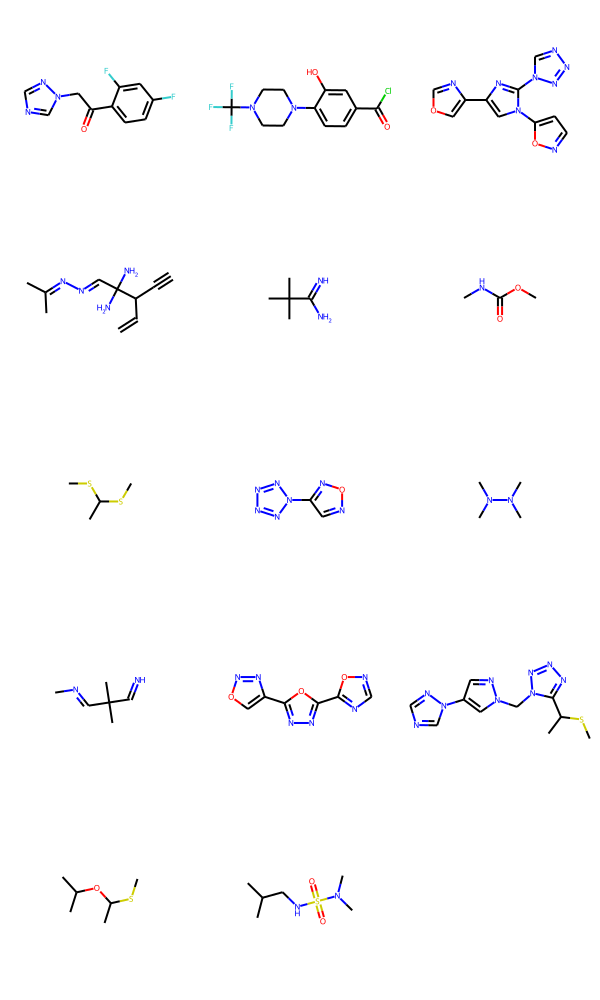

********************************************************************************
acidchloride.aromatic
********************************************************************************
YES match


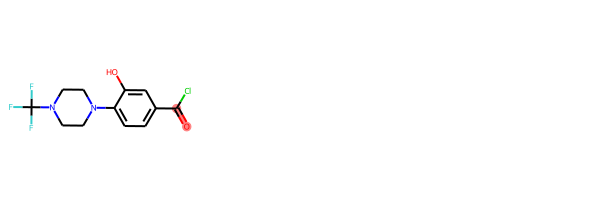

NO match


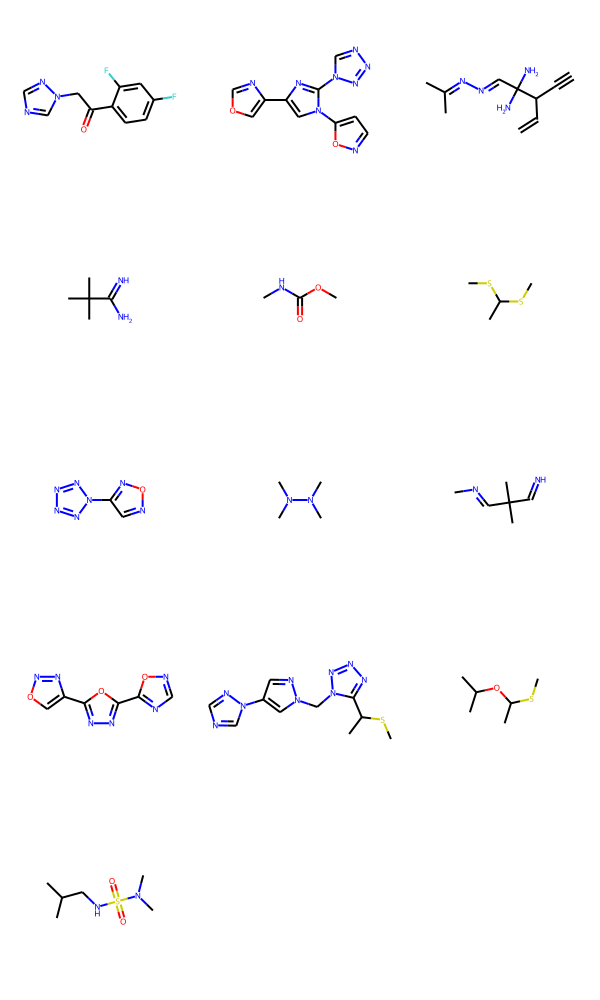

********************************************************************************
alcohol.aromatic
********************************************************************************
YES match


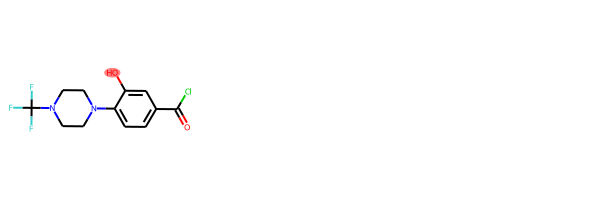

NO match


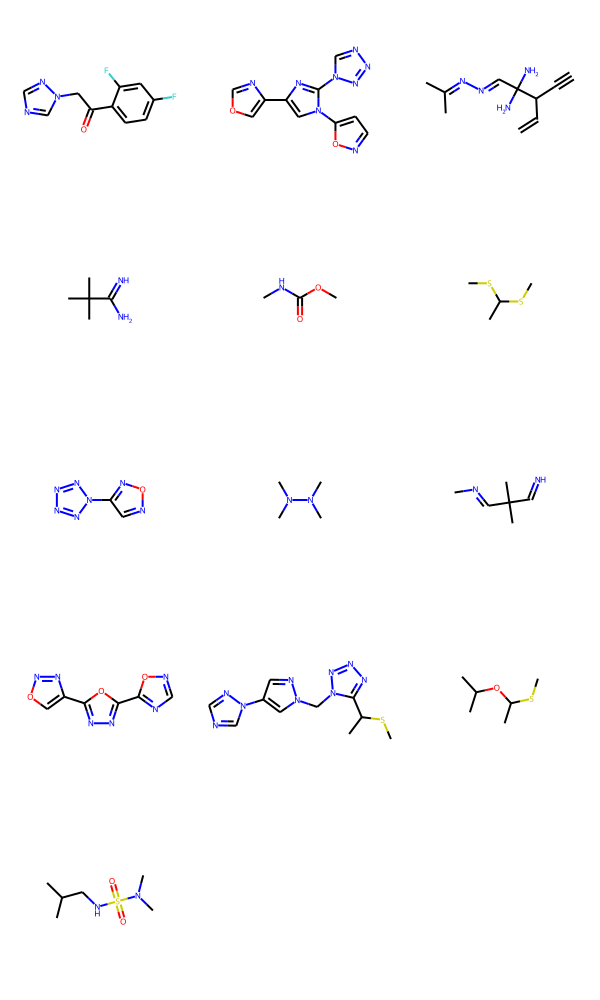

********************************************************************************
halogen.fluorine.trifluoromethyl
********************************************************************************
YES match


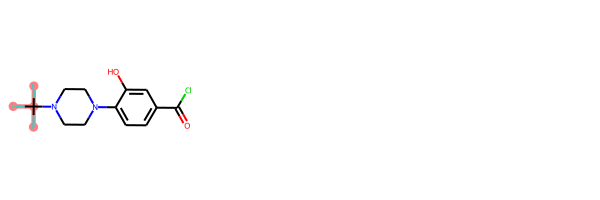

NO match


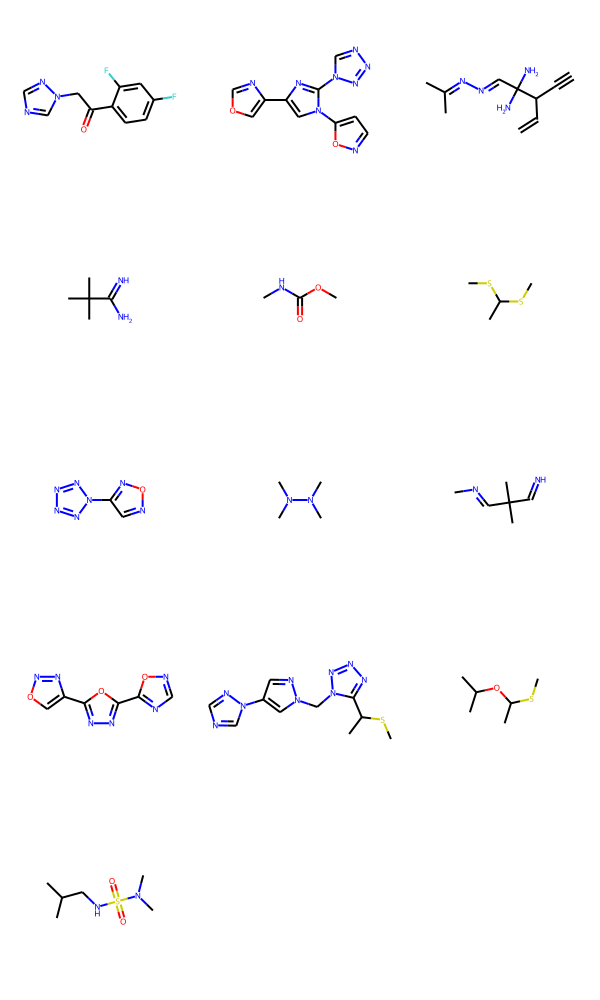

********************************************************************************
piperazine
********************************************************************************
YES match
NO match


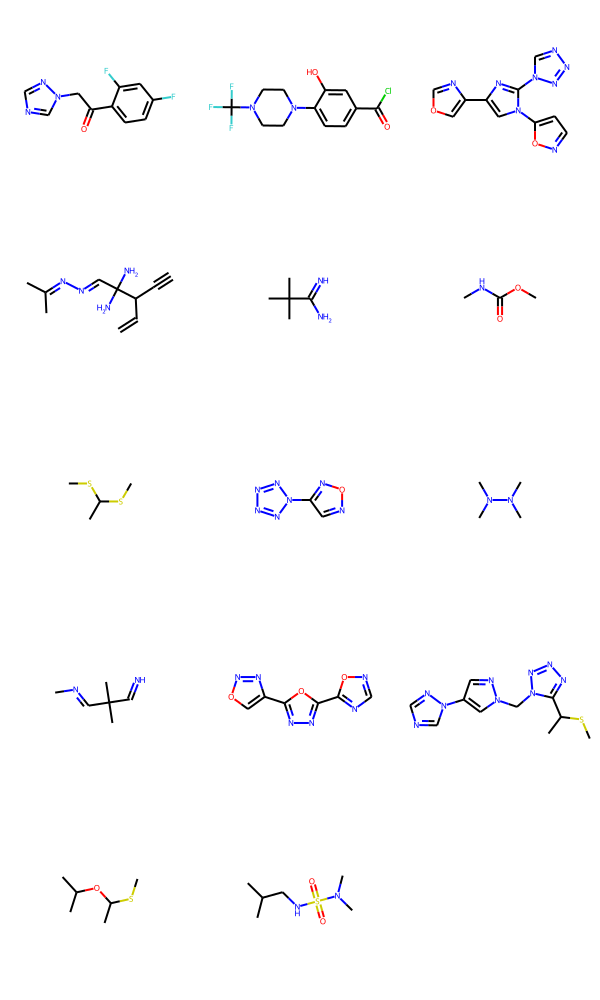

********************************************************************************
oxazole
********************************************************************************
YES match
NO match


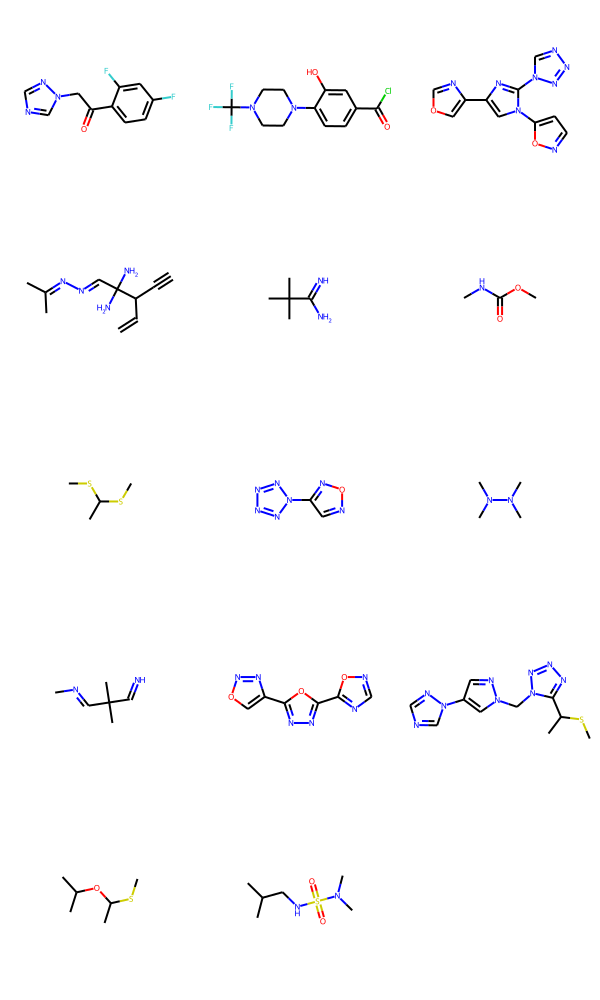

********************************************************************************
isoxazole
********************************************************************************
YES match
NO match


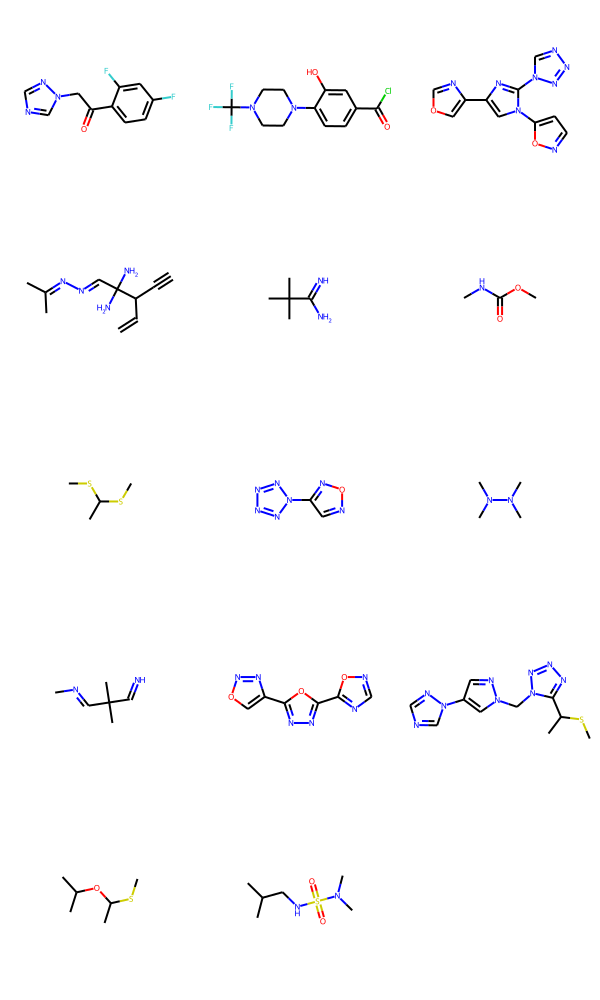

********************************************************************************
tetrazole
********************************************************************************
YES match
NO match


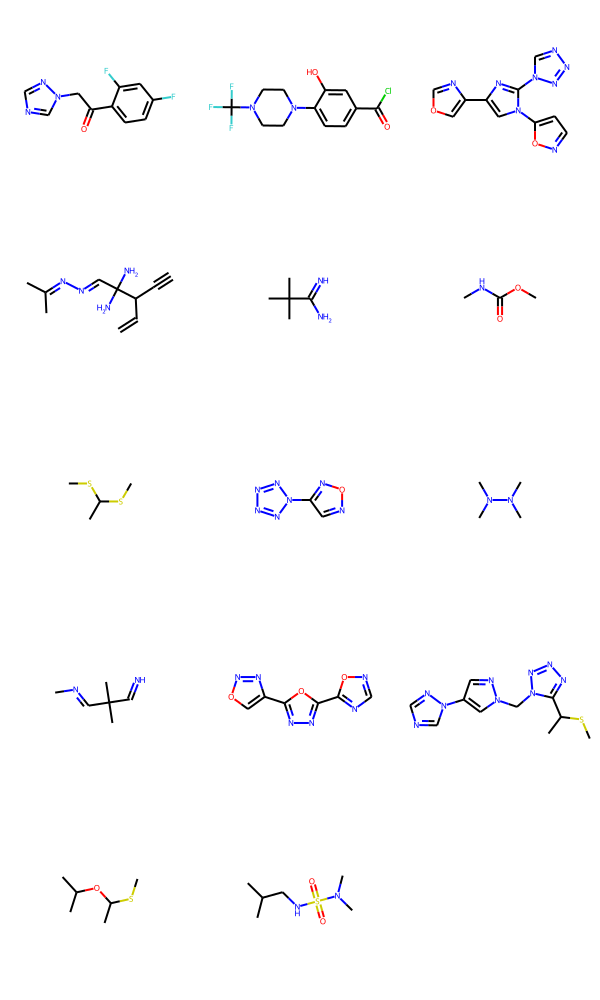

********************************************************************************
imidazole
********************************************************************************
YES match
NO match


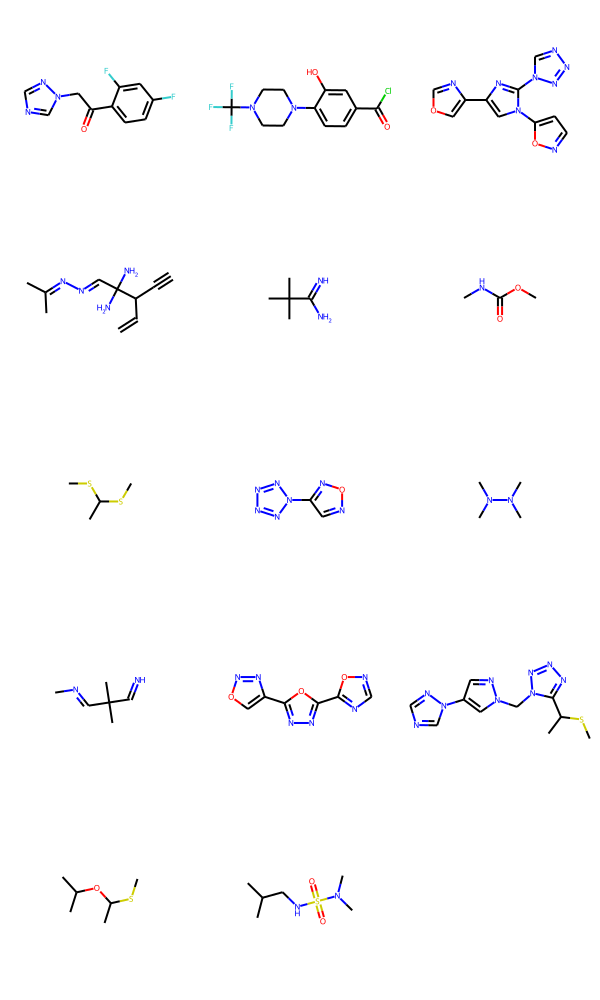

********************************************************************************
alkene.terminal
********************************************************************************
YES match


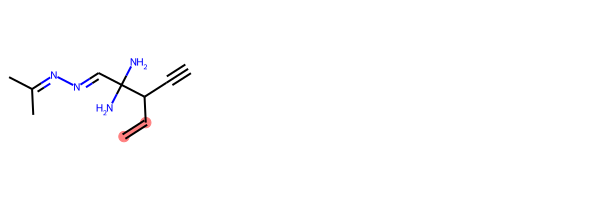

NO match


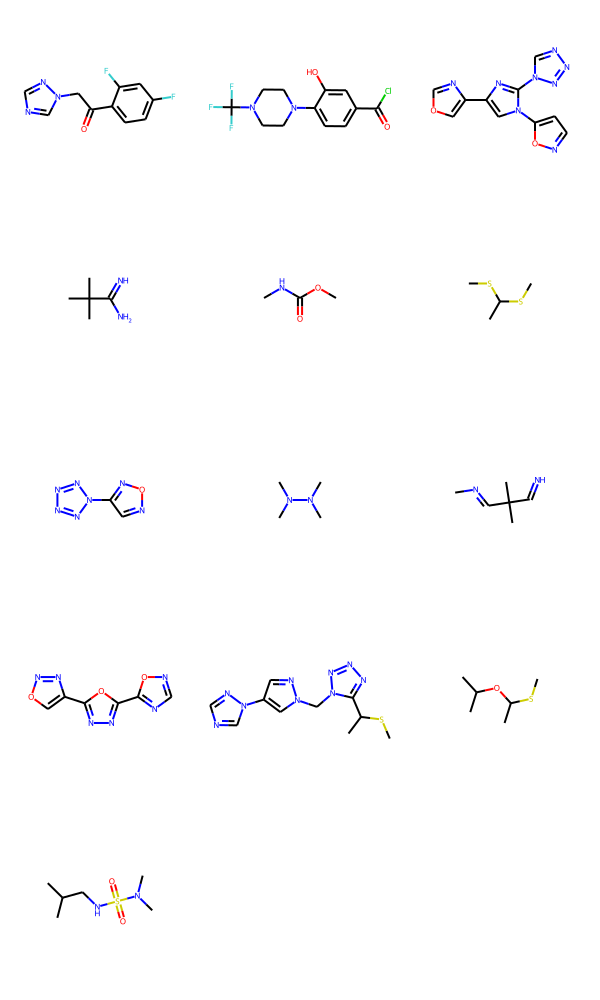

********************************************************************************
azine
********************************************************************************
YES match
NO match


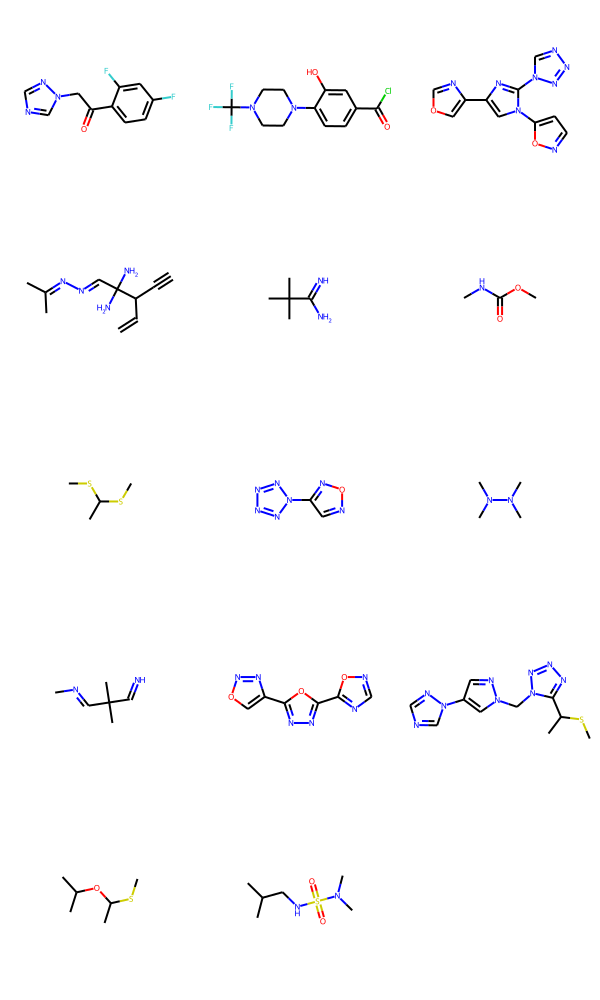

********************************************************************************
amidine
********************************************************************************
YES match
NO match


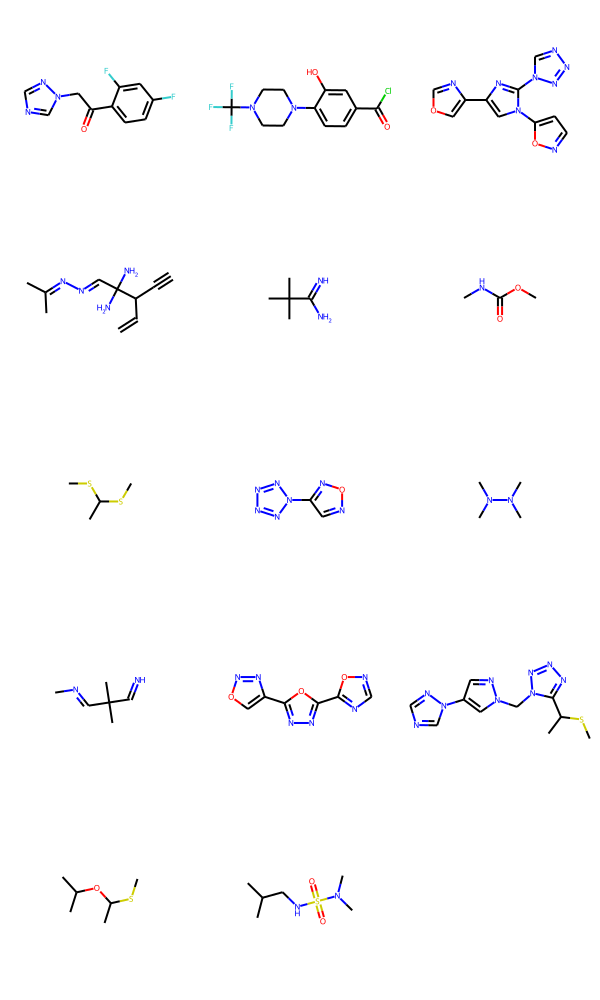

********************************************************************************
carbamate
********************************************************************************
YES match
NO match


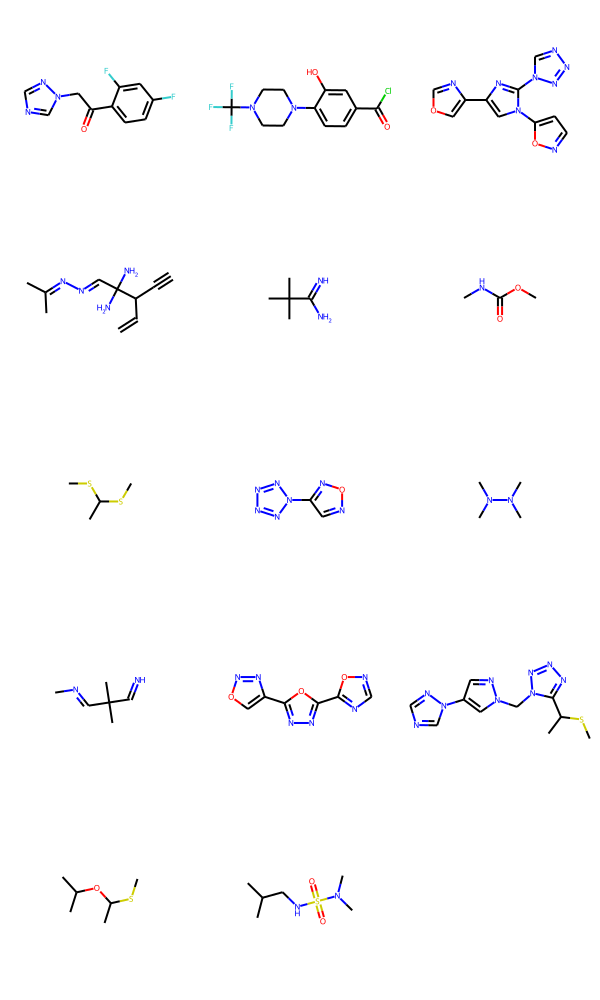

********************************************************************************
dithioacetal
********************************************************************************
YES match
NO match


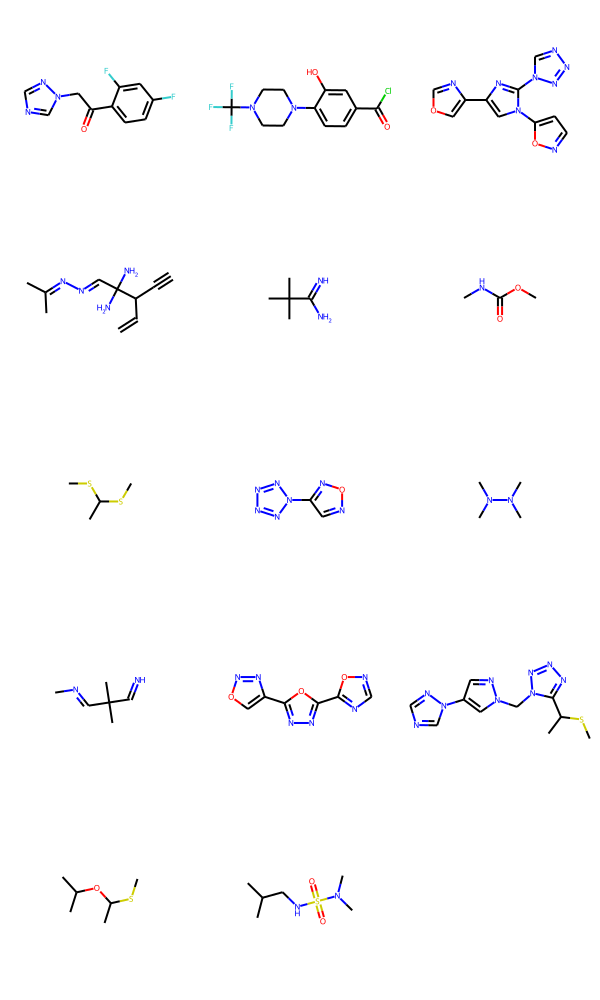

********************************************************************************
furazan
********************************************************************************
YES match
NO match


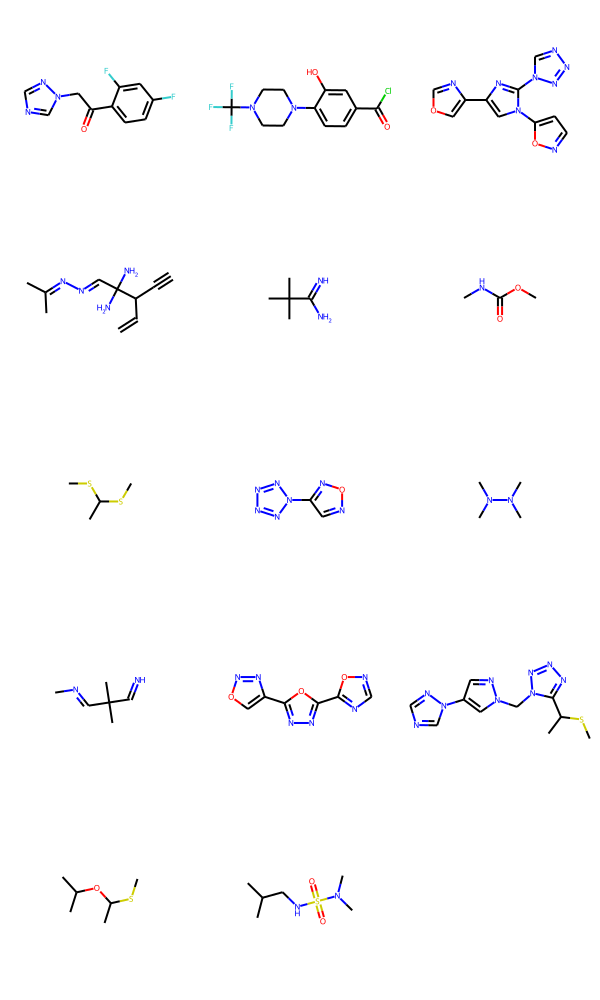

********************************************************************************
pentazole
********************************************************************************
YES match
NO match


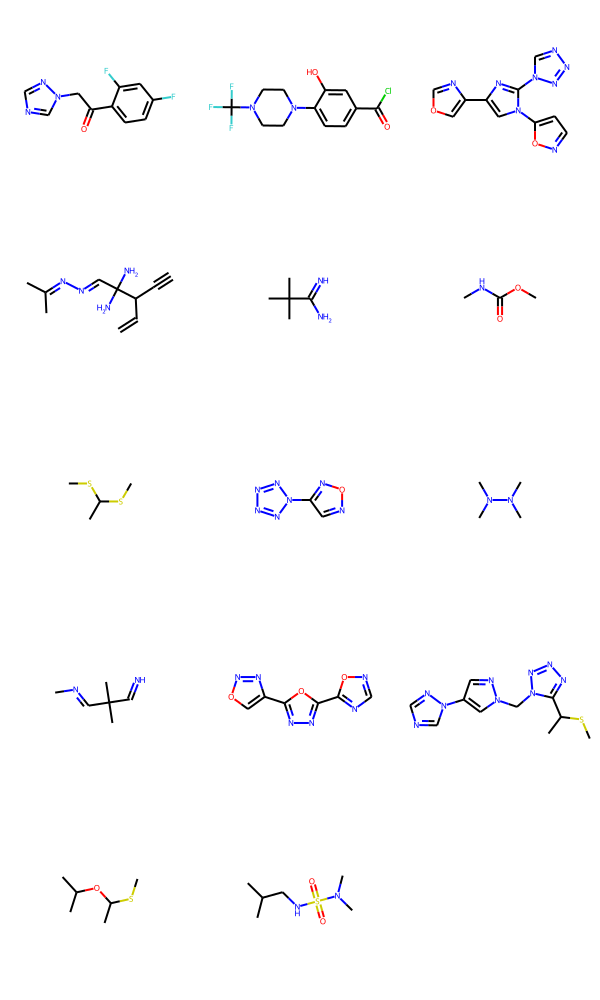

********************************************************************************
hydrazine
********************************************************************************
YES match
NO match


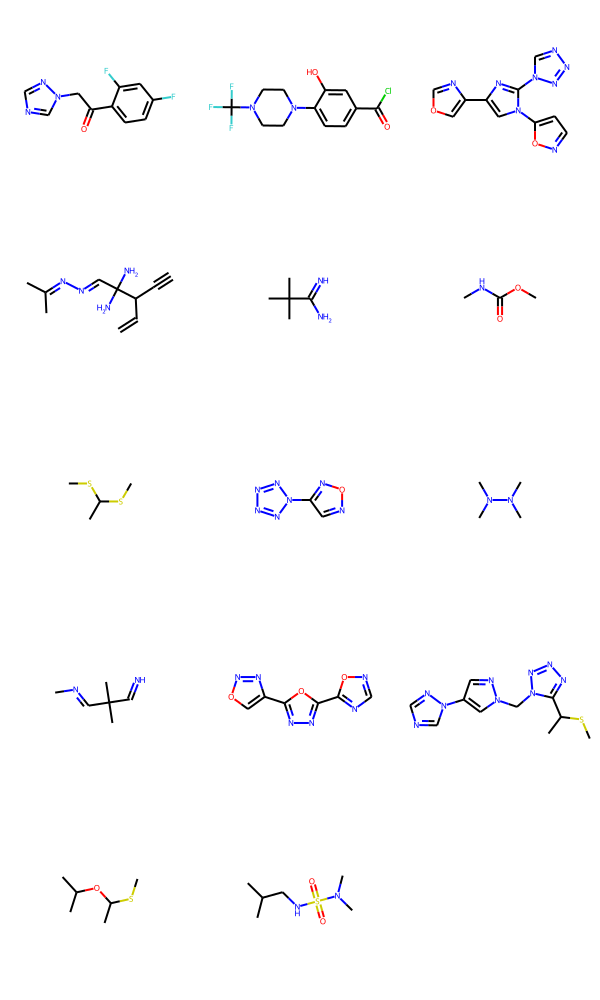

********************************************************************************
imine.aldo.primary
********************************************************************************
YES match
NO match


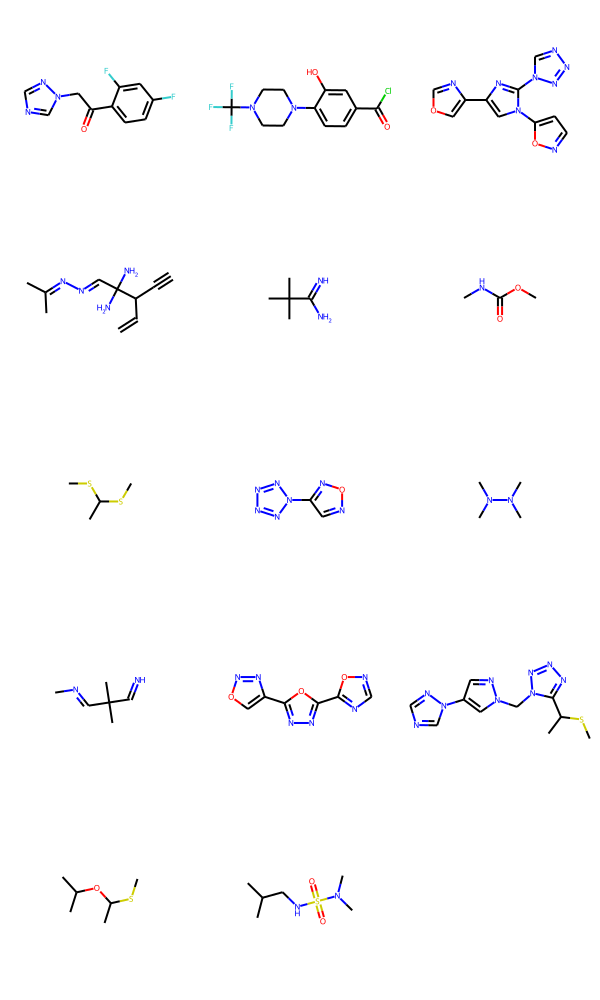

********************************************************************************
imine.aldo.secondary
********************************************************************************
YES match
NO match


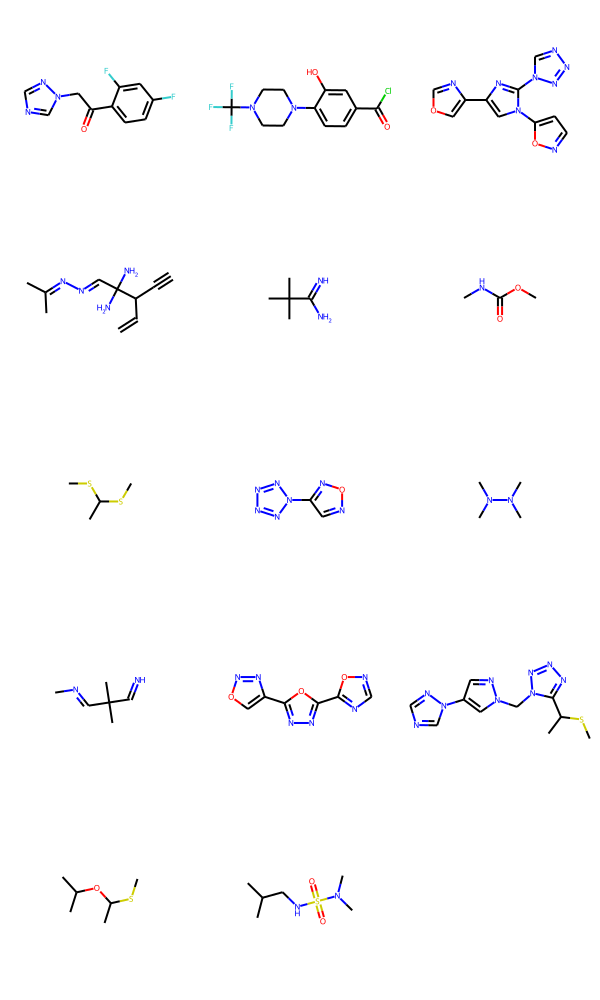

********************************************************************************
oxadiazole
********************************************************************************
YES match
NO match


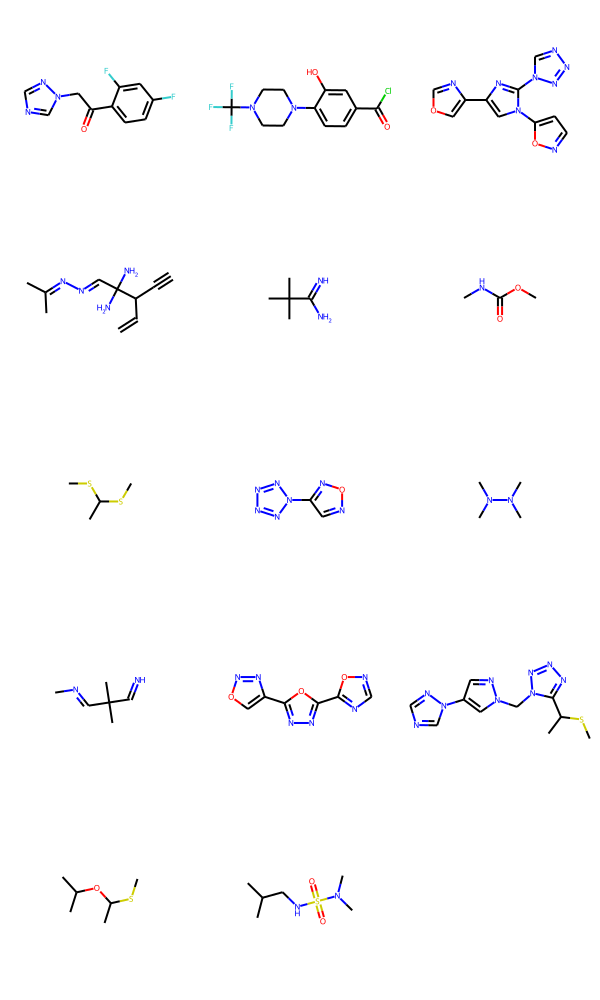

********************************************************************************
pyrazole
********************************************************************************
YES match
NO match


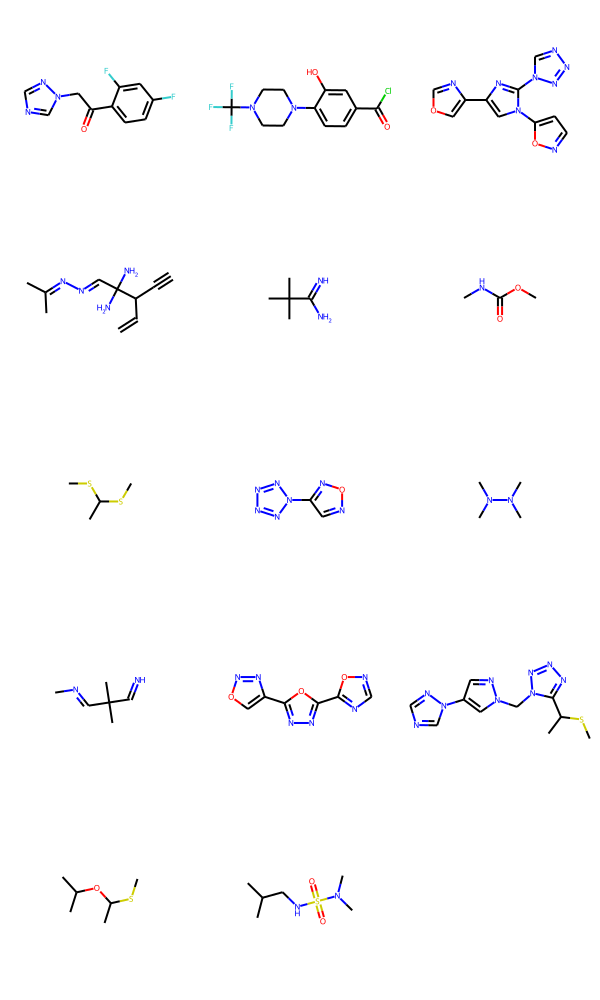

********************************************************************************
thioether (sulfide)
********************************************************************************
YES match
NO match


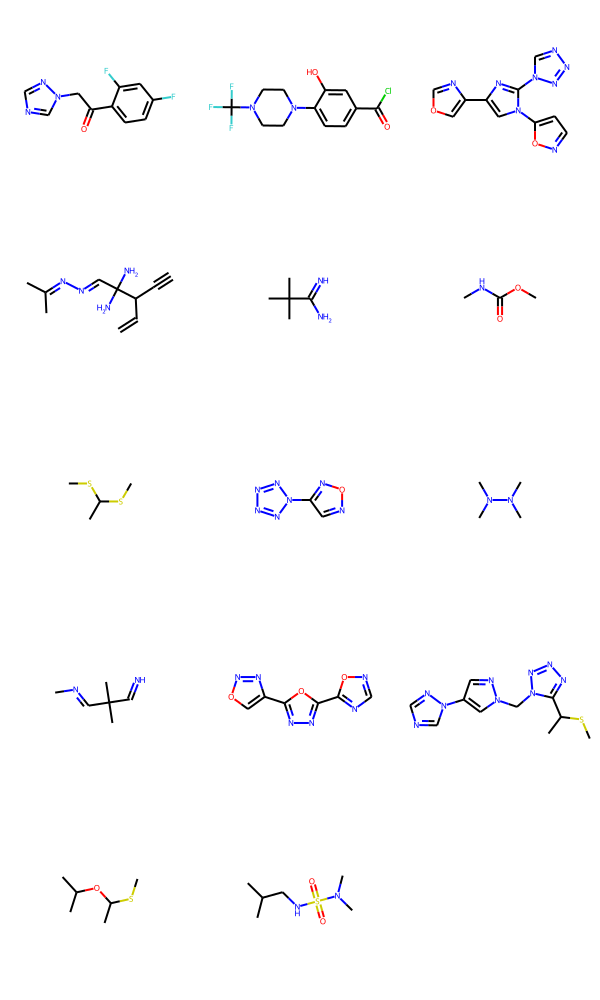

********************************************************************************
thioacetal
********************************************************************************
YES match
NO match


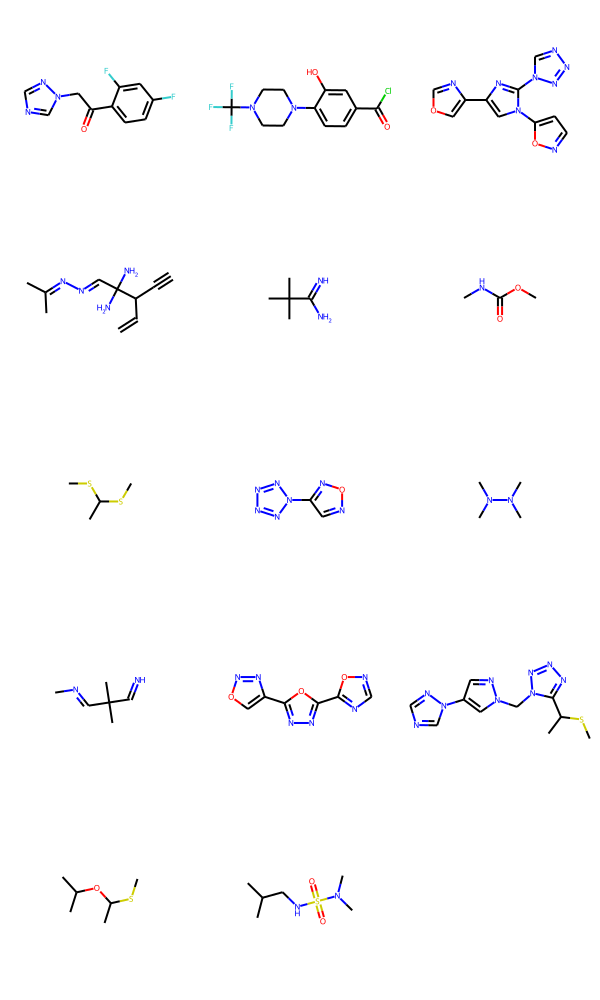

********************************************************************************
sulfoxide.sulfone.sulfamide
********************************************************************************
YES match


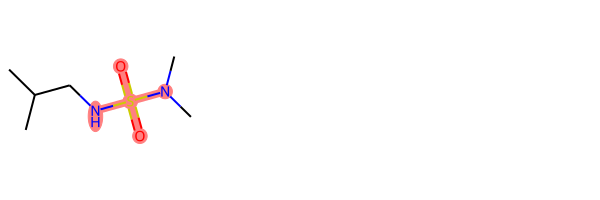

NO match


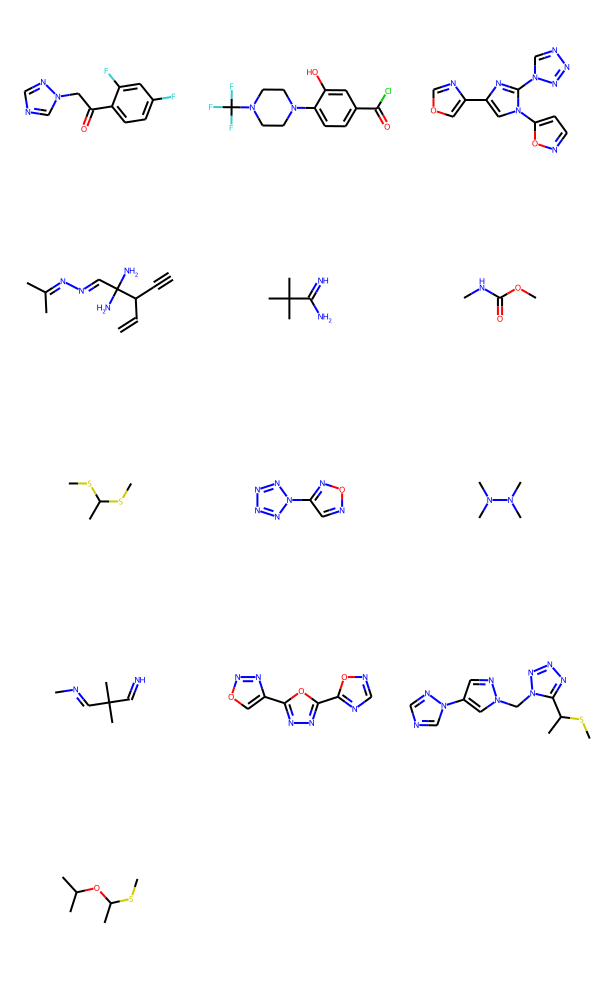

In [8]:
for rule in test_data["FG"].unique():
    print("*"*80)
    print(rule)
    print("*"*80)
    display_split_by_rules(test_data["SMILES"].unique(),[rule])

********************************************************************************
halogen.fluorine.aromatic
********************************************************************************
YES match


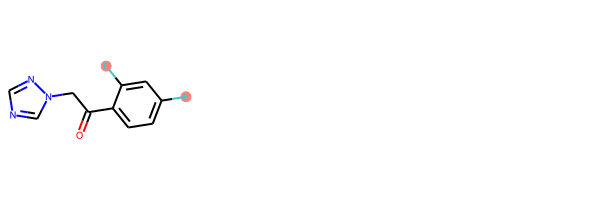

NO match


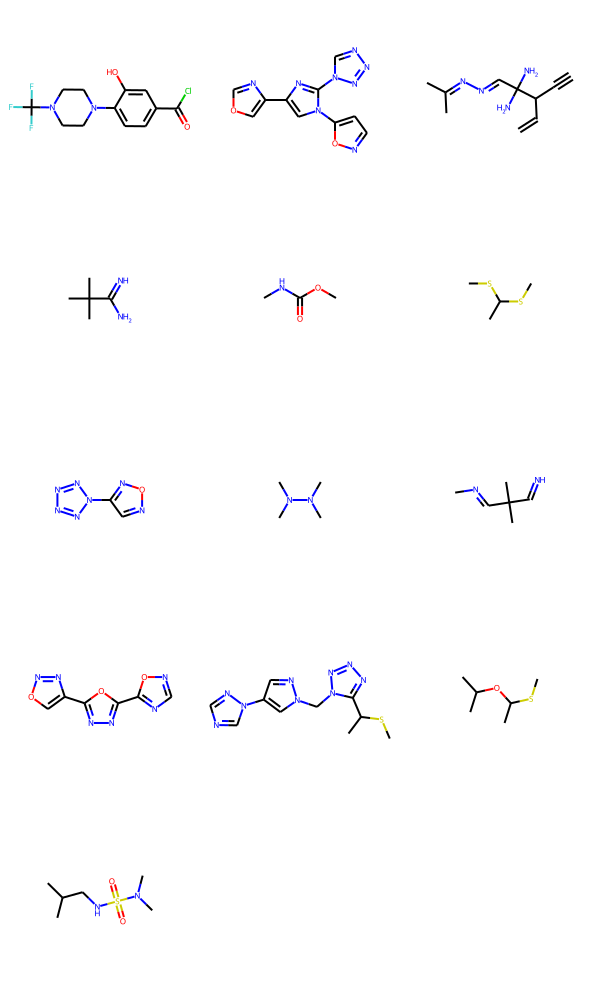

********************************************************************************
ketone
********************************************************************************
YES match
NO match


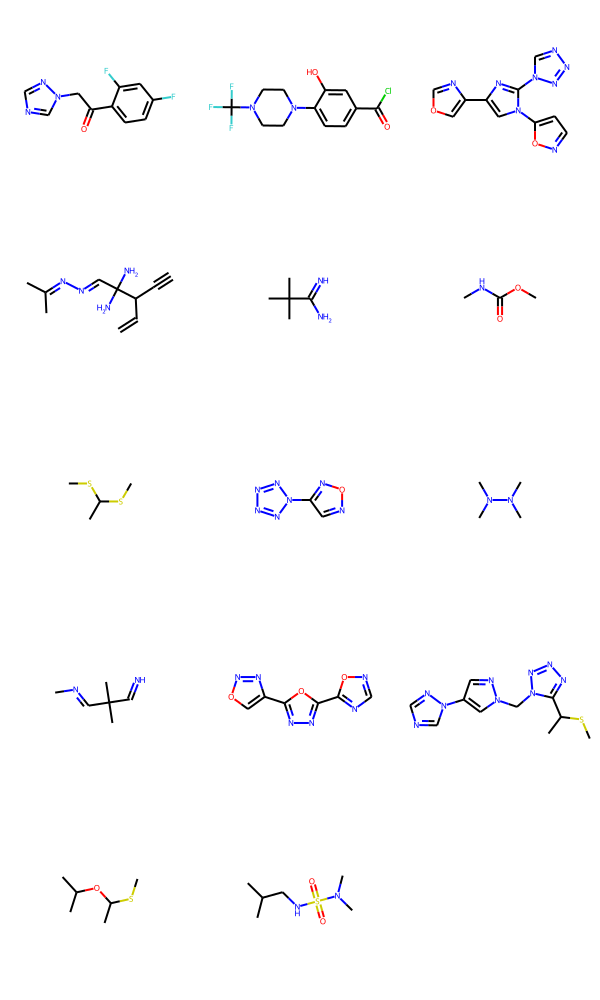

********************************************************************************
triazole
********************************************************************************
YES match
NO match


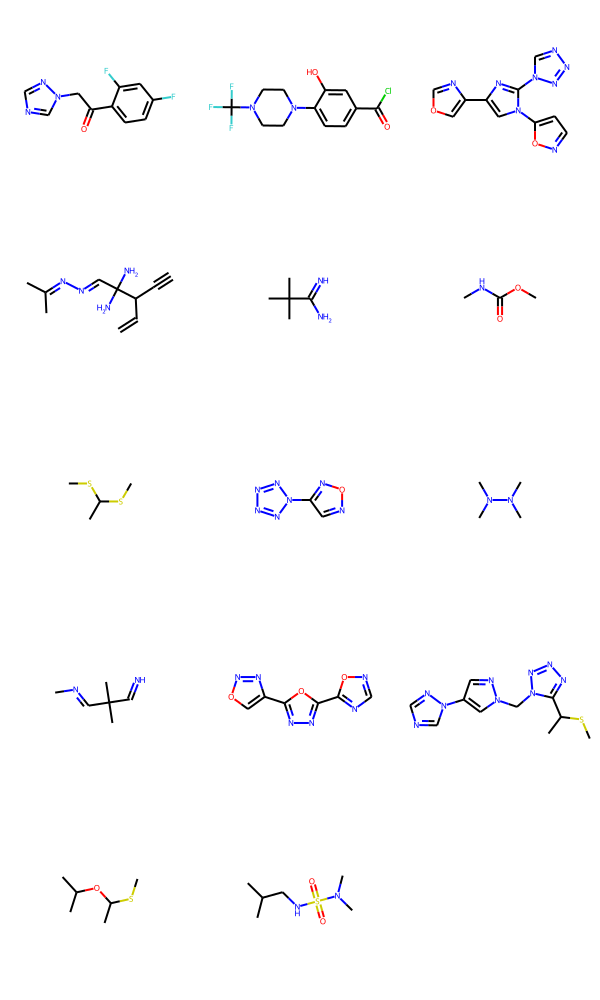

********************************************************************************
acidchloride.aromatic
********************************************************************************
YES match


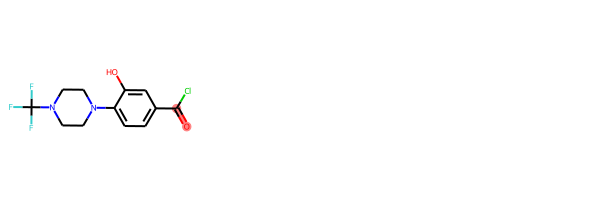

NO match


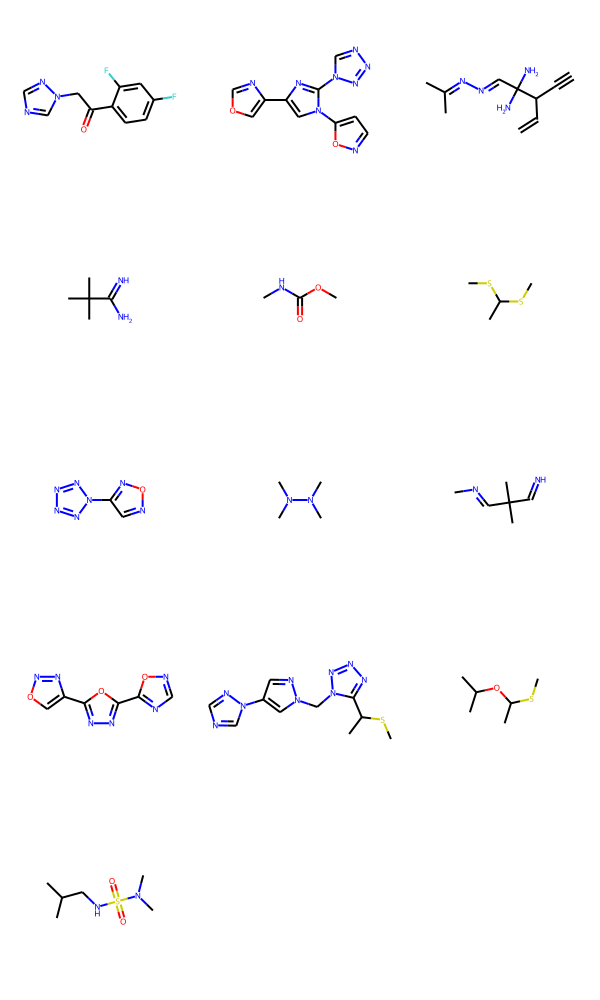

********************************************************************************
alcohol.aromatic
********************************************************************************
YES match


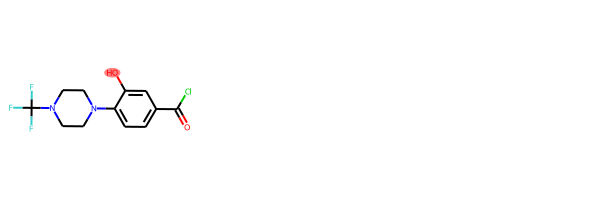

NO match


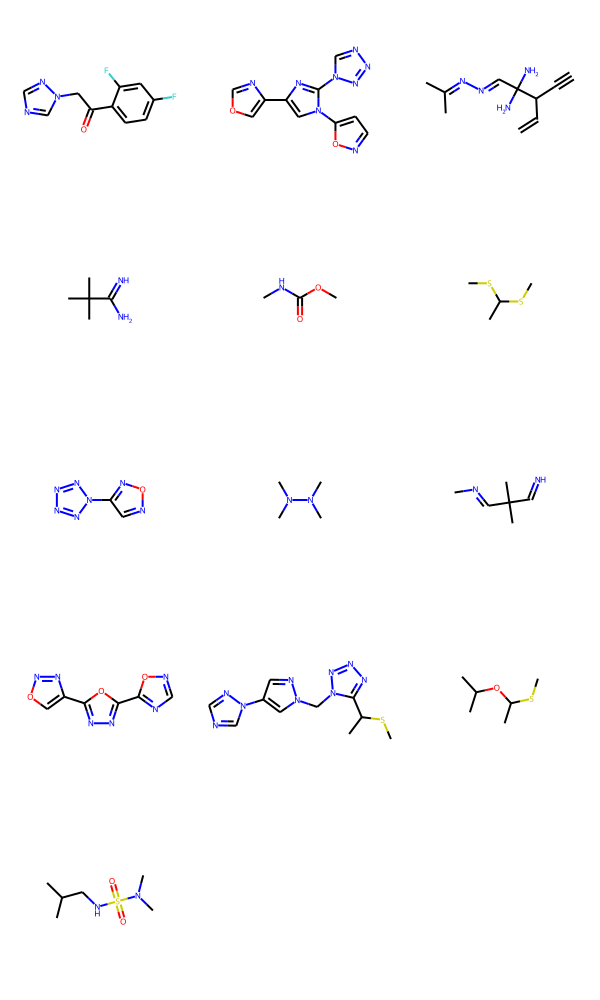

********************************************************************************
halogen.fluorine.trifluoromethyl
********************************************************************************
YES match


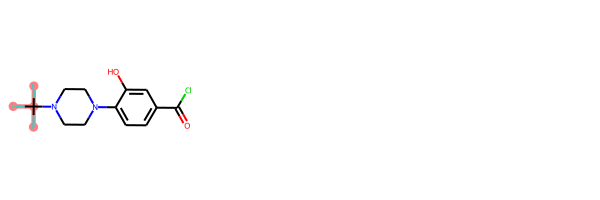

NO match


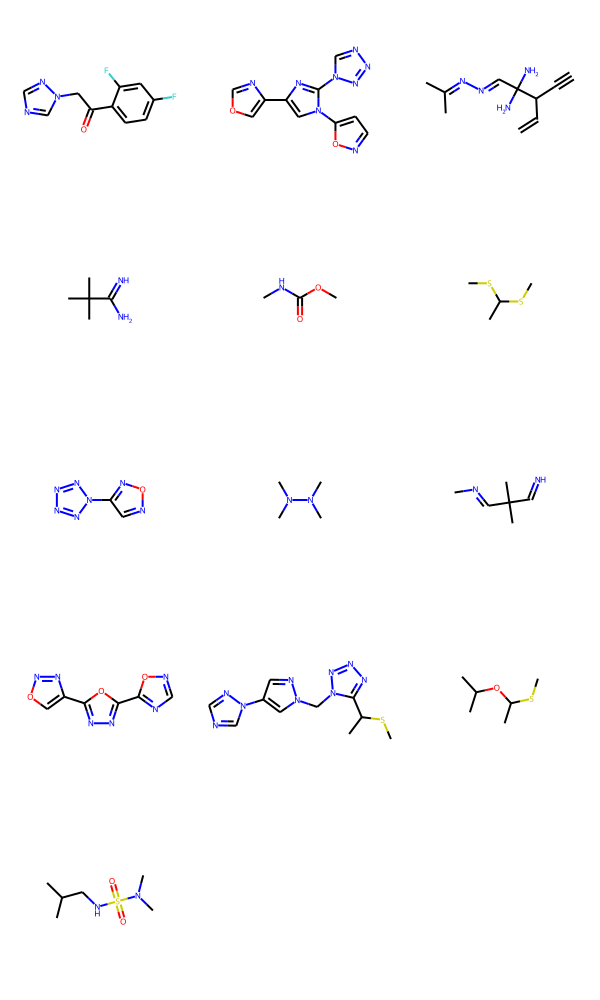

********************************************************************************
piperazine
********************************************************************************
YES match
NO match


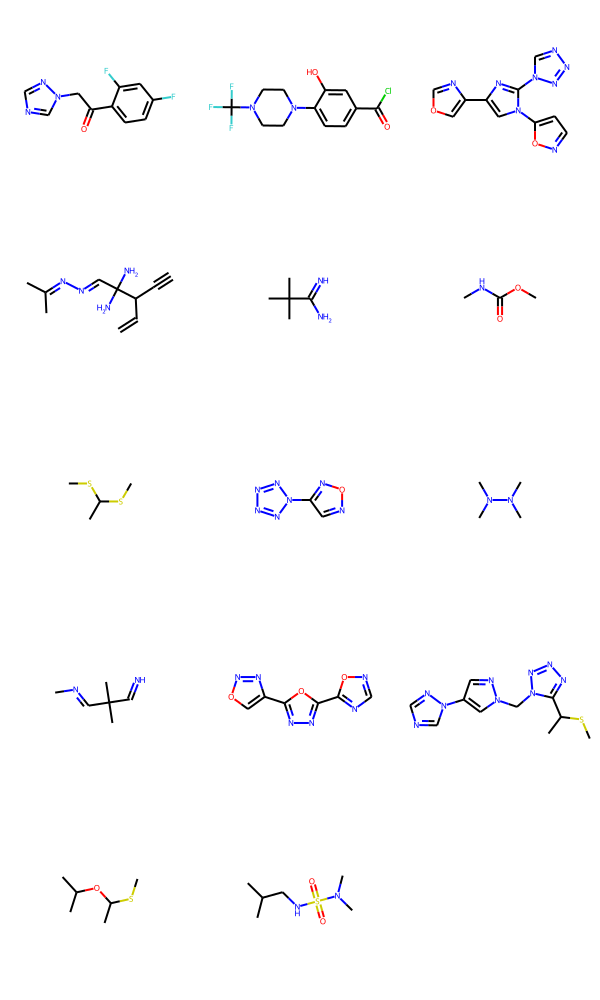

********************************************************************************
oxazole
********************************************************************************
YES match
NO match


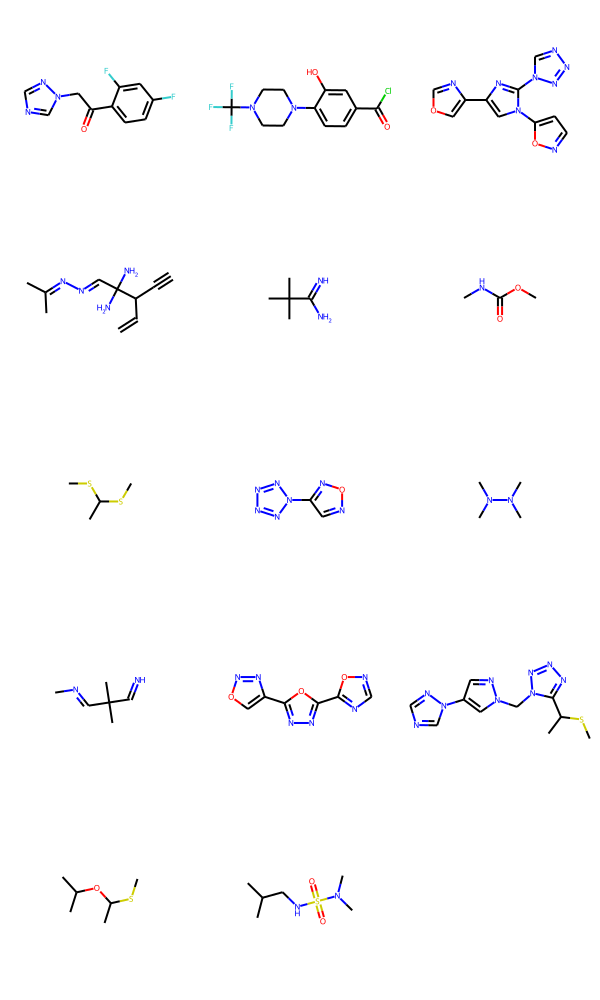

********************************************************************************
isoxazole
********************************************************************************
YES match
NO match


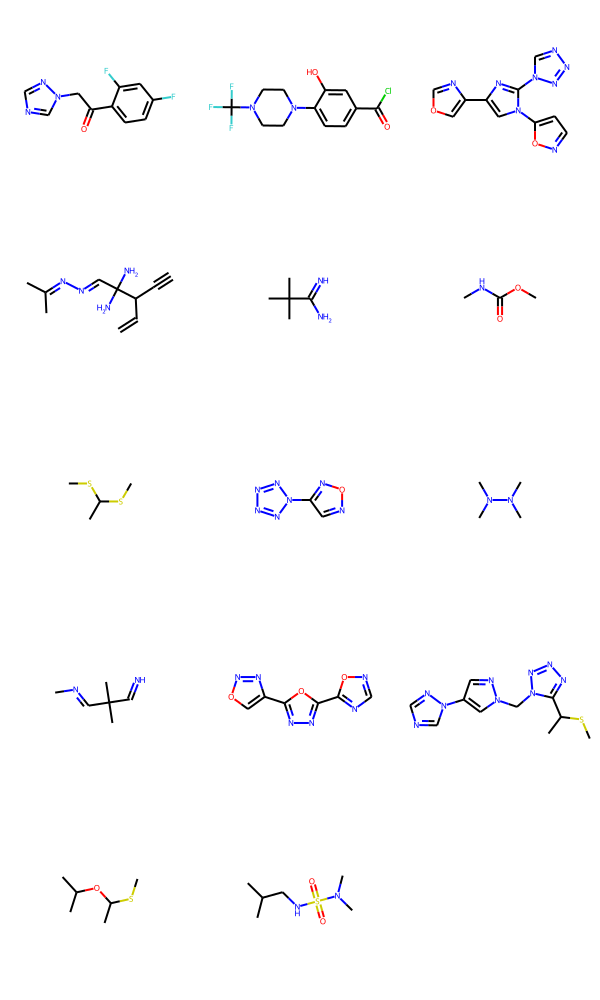

********************************************************************************
tetrazole
********************************************************************************
YES match
NO match


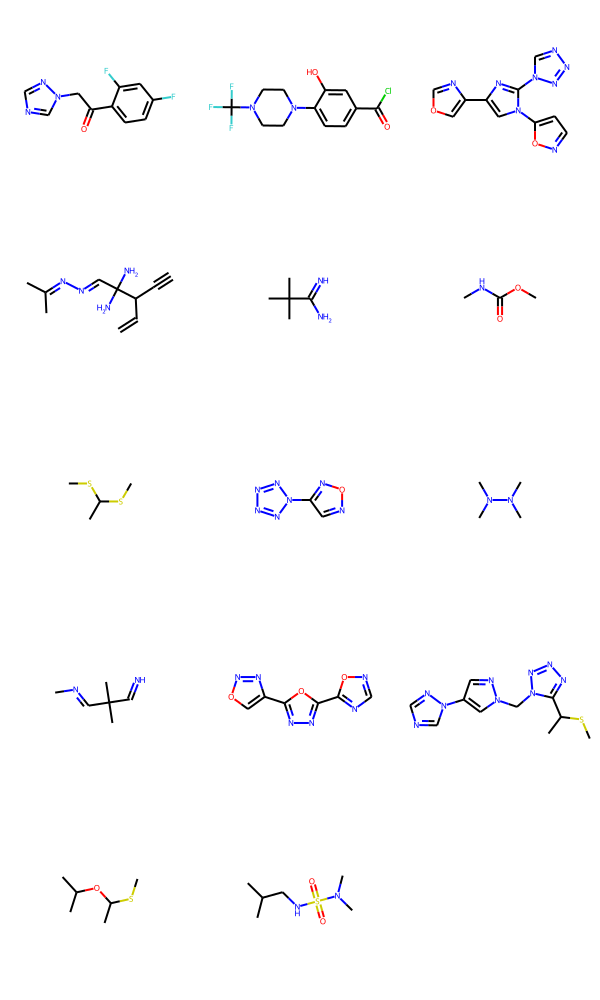

********************************************************************************
imidazole
********************************************************************************
YES match
NO match


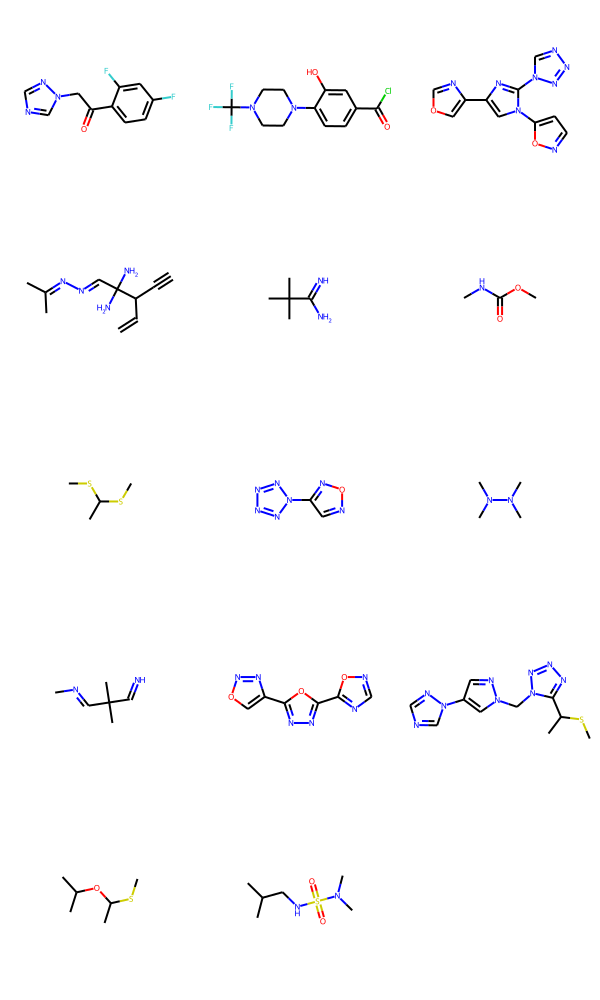

********************************************************************************
alkene.terminal
********************************************************************************
YES match


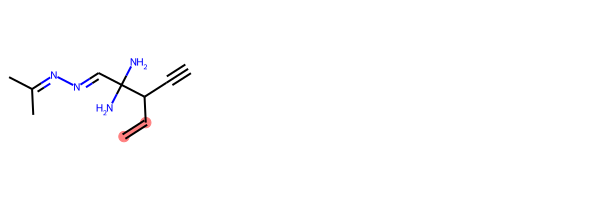

NO match


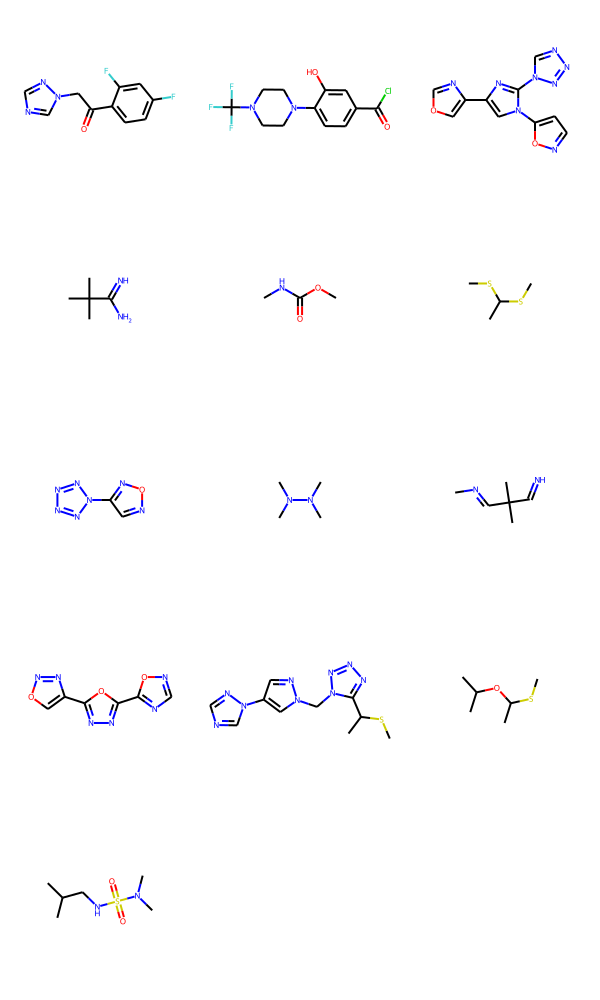

********************************************************************************
azine
********************************************************************************
YES match
NO match


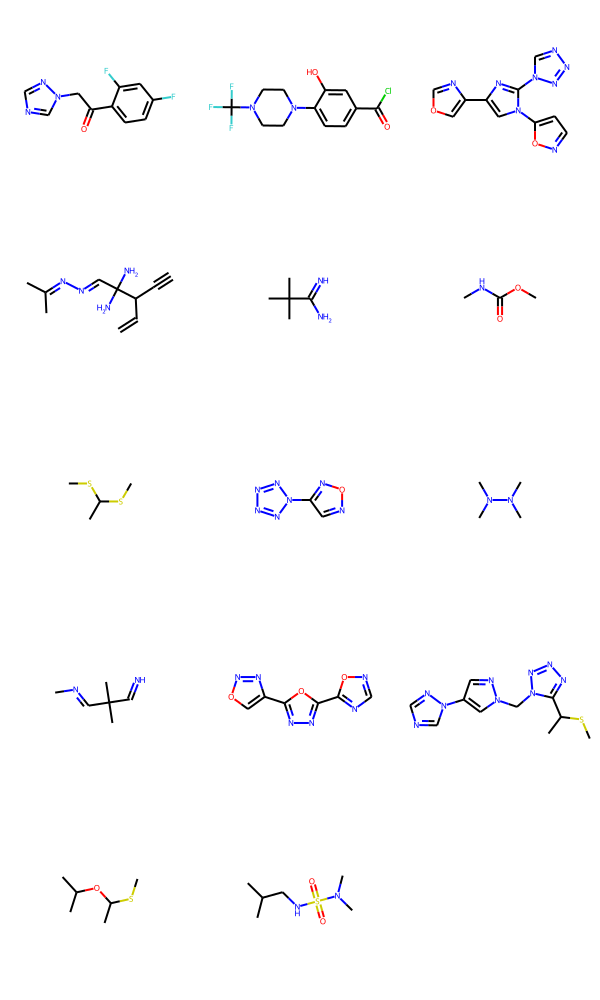

********************************************************************************
amidine
********************************************************************************
YES match
NO match


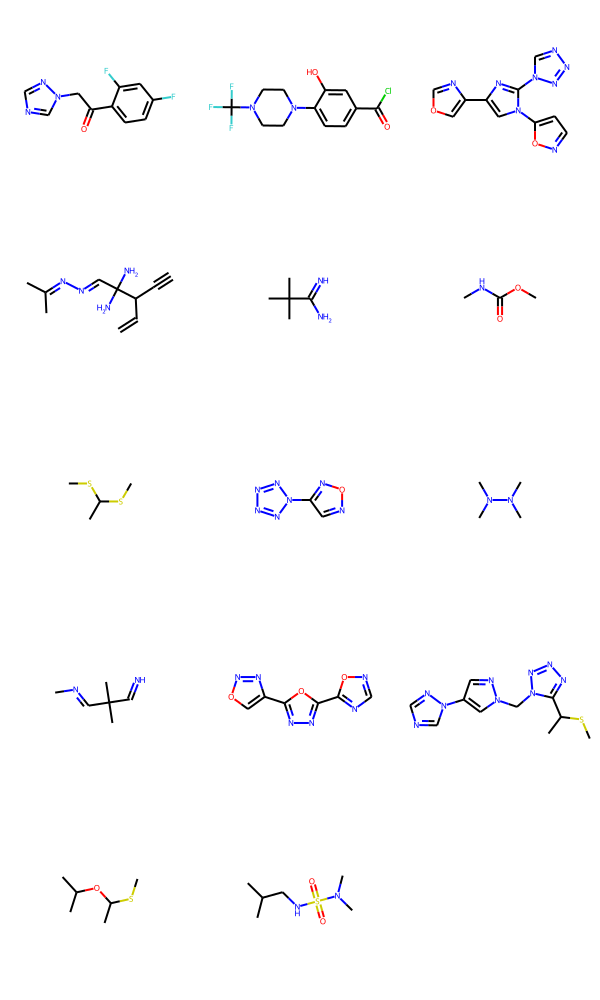

********************************************************************************
carbamate
********************************************************************************
YES match
NO match


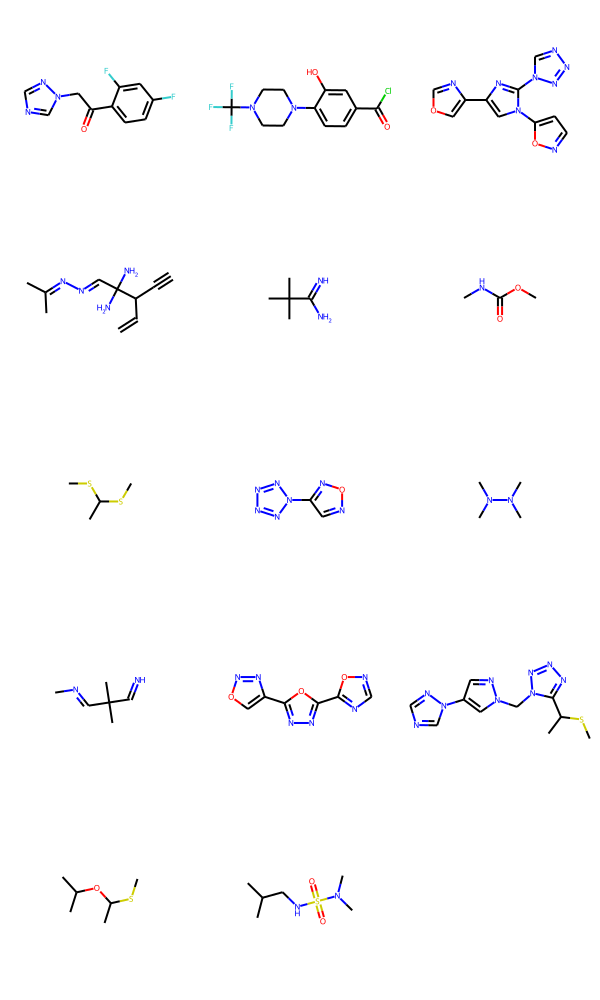

********************************************************************************
dithioacetal
********************************************************************************
YES match
NO match


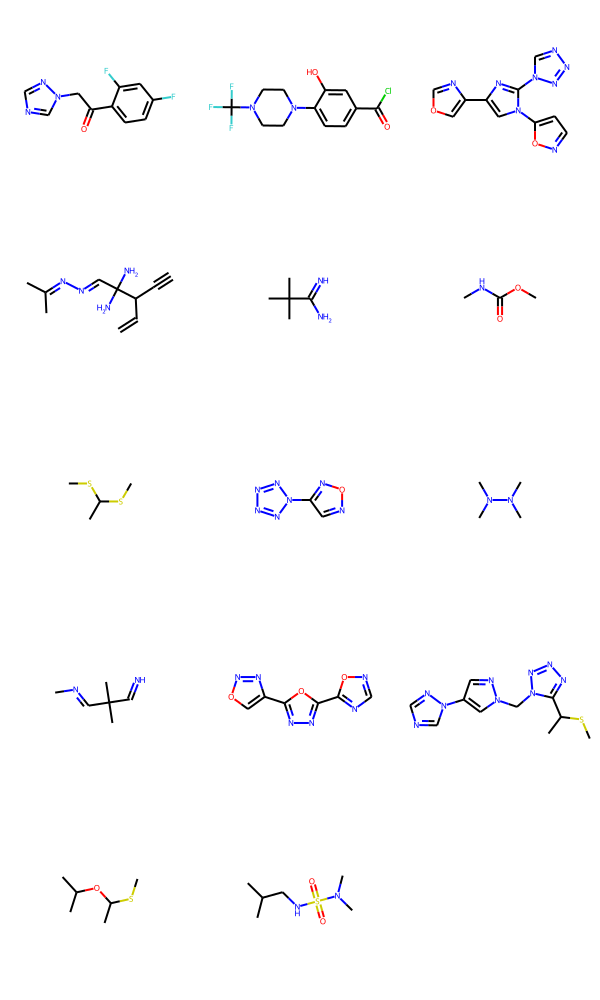

********************************************************************************
furazan
********************************************************************************
YES match
NO match


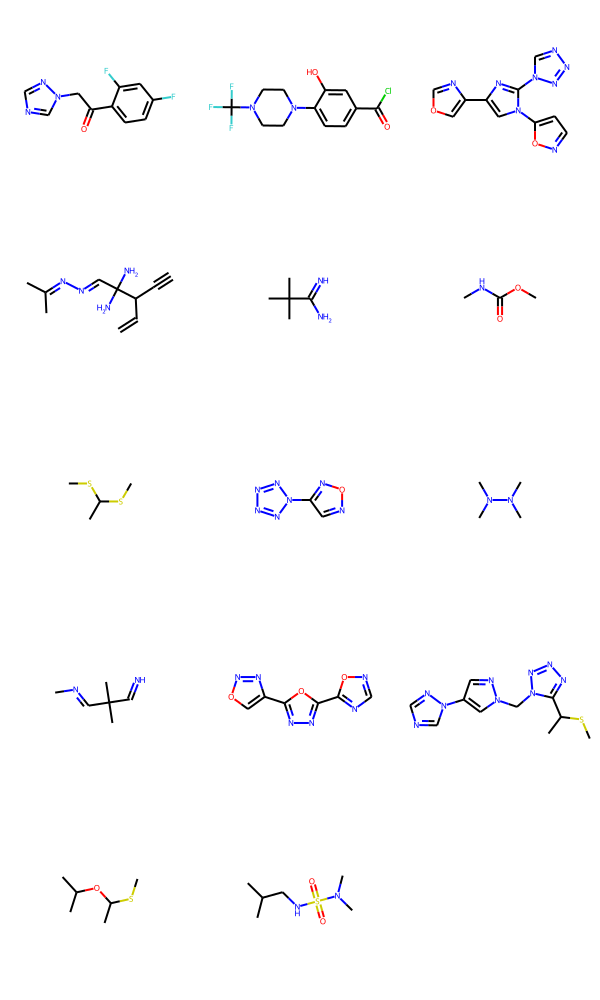

********************************************************************************
pentazole
********************************************************************************
YES match
NO match


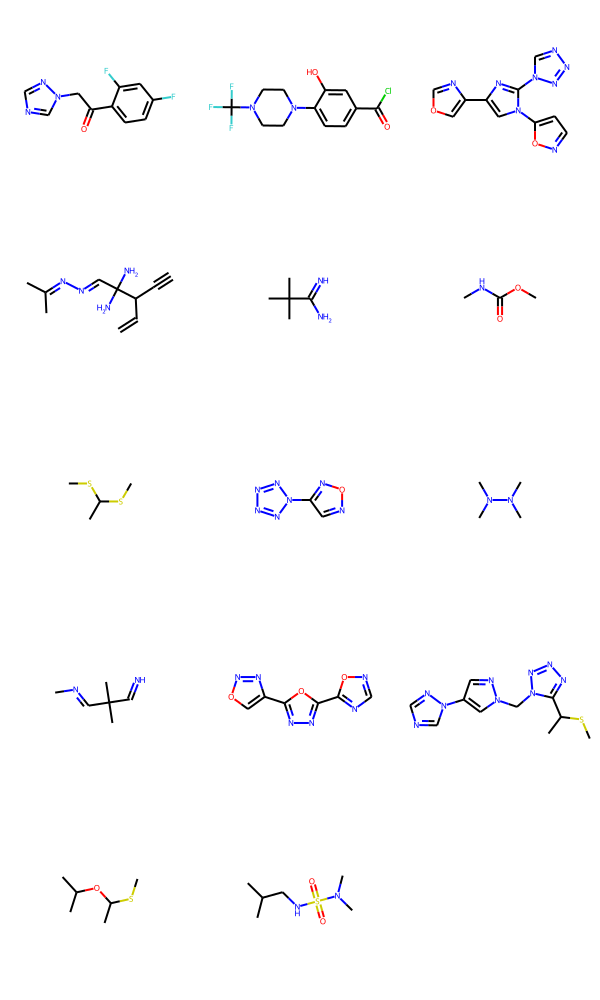

********************************************************************************
hydrazine
********************************************************************************
YES match
NO match


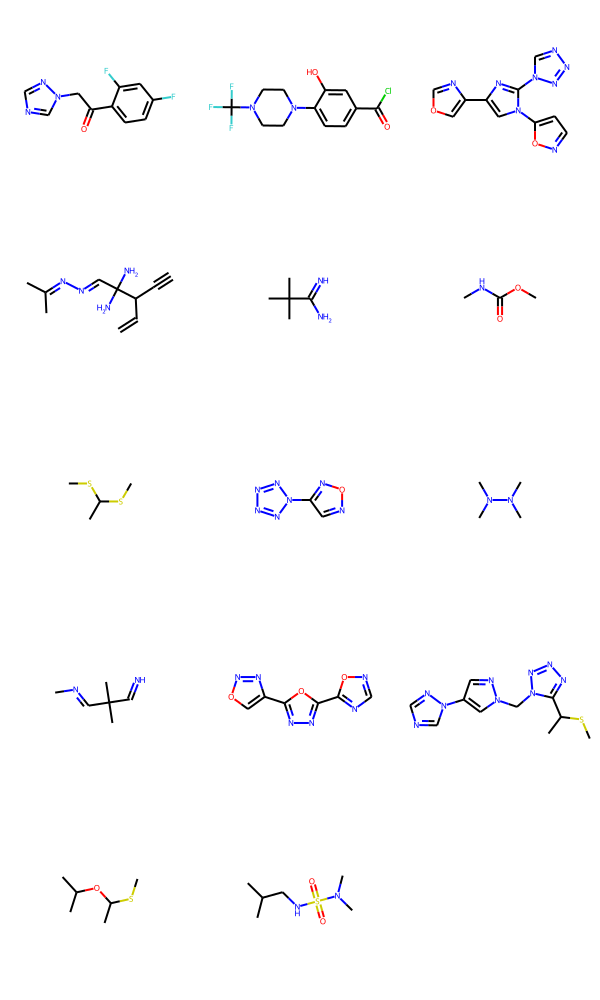

********************************************************************************
imine.aldo.primary
********************************************************************************
YES match
NO match


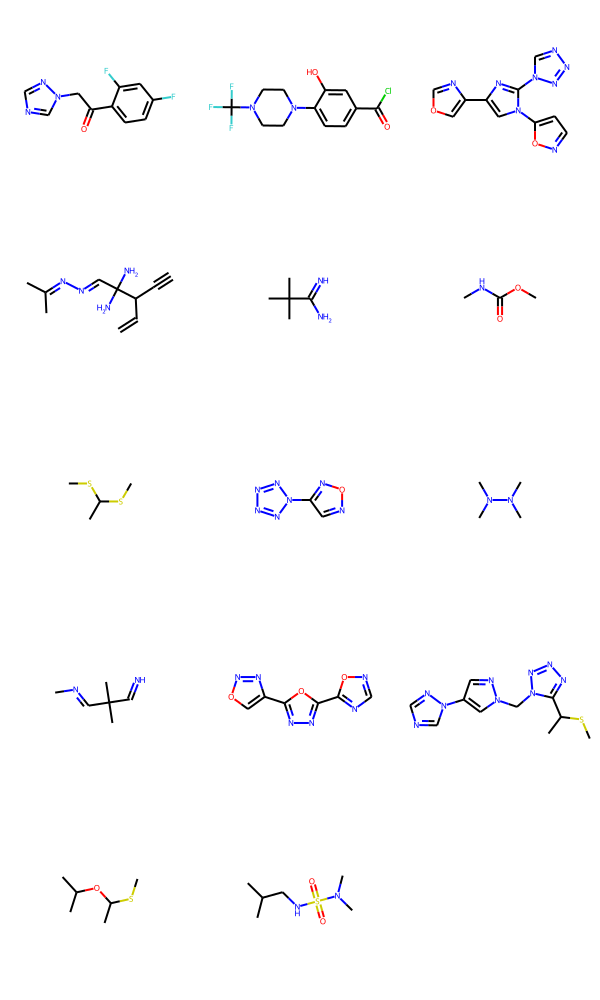

********************************************************************************
imine.aldo.secondary
********************************************************************************
YES match
NO match


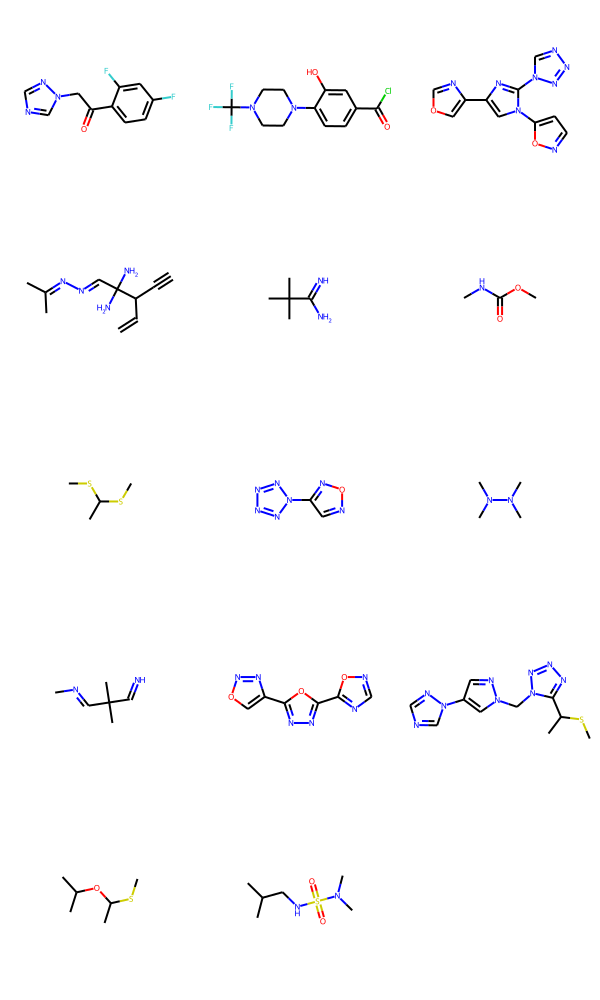

********************************************************************************
oxadiazole
********************************************************************************
YES match
NO match


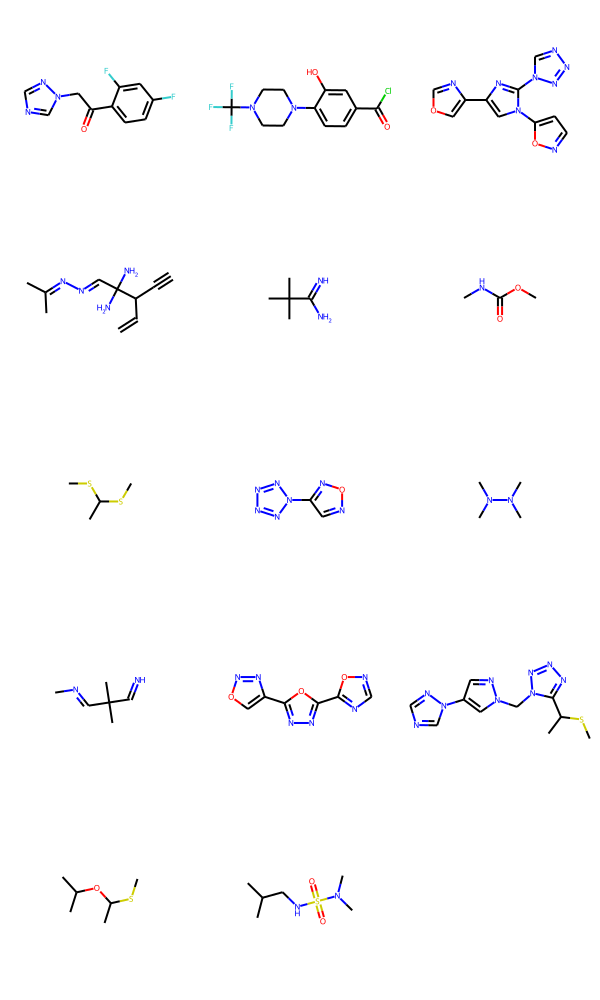

********************************************************************************
pyrazole
********************************************************************************
YES match
NO match


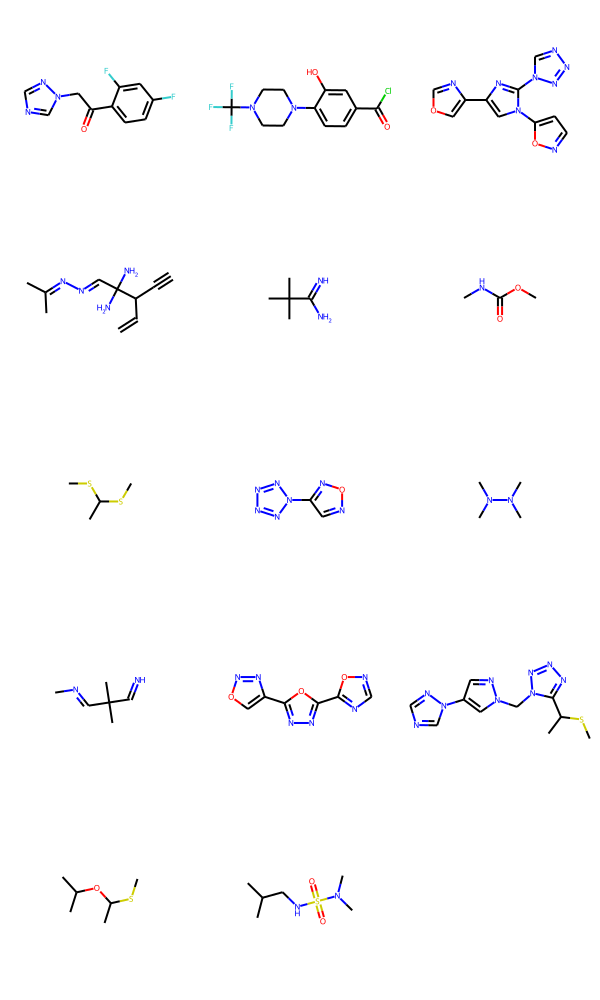

********************************************************************************
thioether (sulfide)
********************************************************************************
YES match
NO match


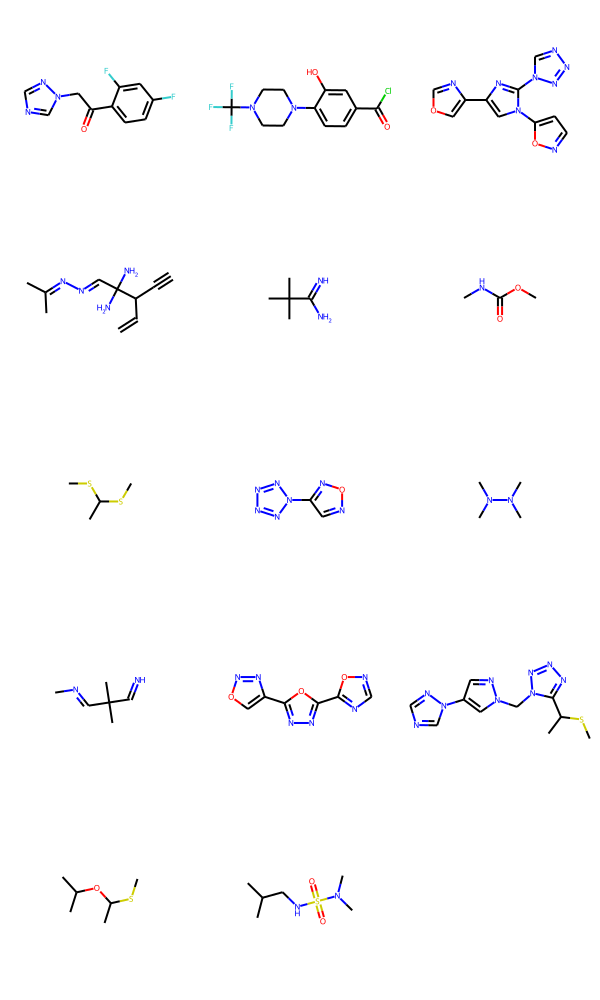

********************************************************************************
thioacetal
********************************************************************************
YES match
NO match


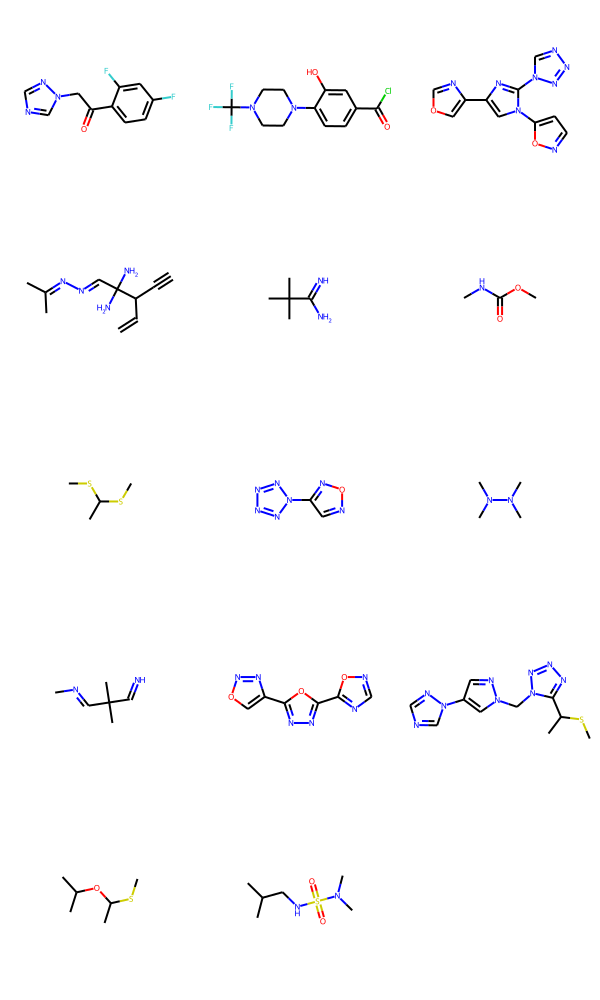

********************************************************************************
sulfoxide.sulfone.sulfamide
********************************************************************************
YES match


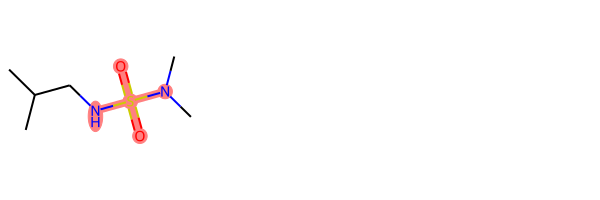

NO match


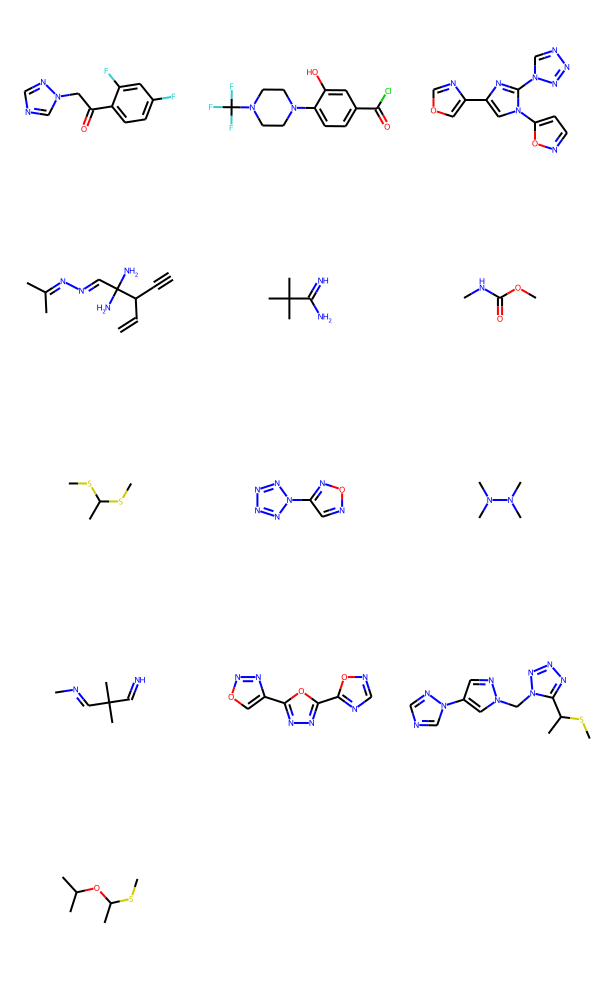

In [9]:
for rule in test_data["FG"].unique():
    print("*"*80)
    print(rule)
    print("*"*80)
    display_split_by_rules(test_data["SMILES"].unique(),[rule])
    

In [ ]:
display_split_by_rules(test_data["SMILES"].unique(),["acidchloride.aromatic"])

In [ ]:
p_str